In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import sounddevice as sd
np.random.seed(22)

T_list = []
num_series_list = []
coint_frac_list = []
num_of_rw_list = []
SADF_list = []
crit_95_list = []
crit_99_list = []

In [2]:
z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, 50)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, 50)) #constant
num_series = 50
B = 2000
delta = 0.015
multipliers = mf.unique_rounded_uniform(1, 2, num_series, decimals=3) #constant

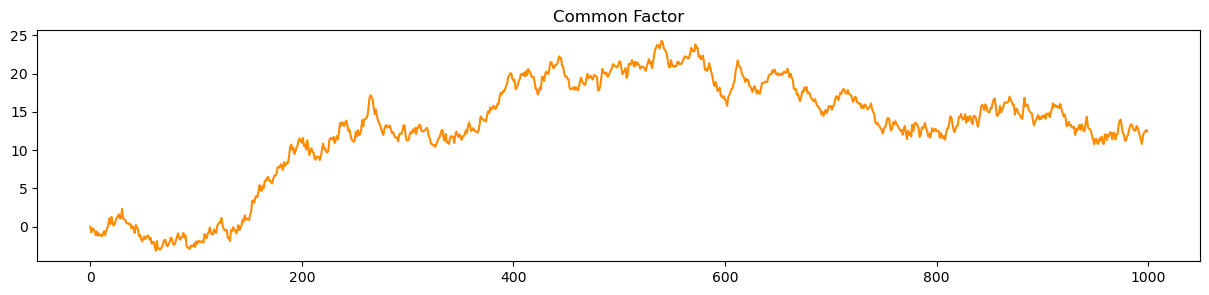

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

### Number of Bubble Series 40%

In [5]:
num_of_rw = 0.4

## N = 300

In [7]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [8]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [9]:
# 1

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

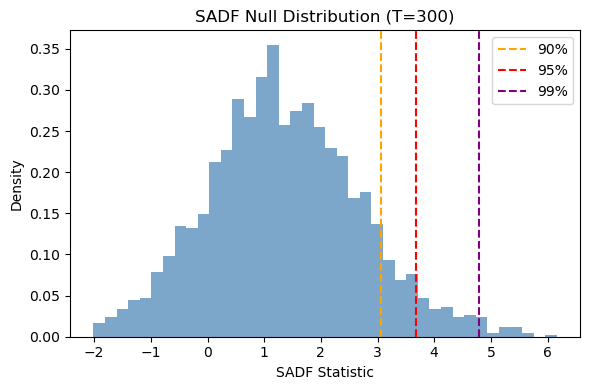

     Critical Value
90%        3.065816
95%        3.673327
99%        4.790144


beta =  [ 0.18767027  0.0934667  -0.09036358  0.08417488  0.18543635 -0.03806102
  0.09570217 -0.14874708  0.07867073 -0.0195521  -0.02644254  0.06773103
  0.01348517  0.02874802 -0.04820017  0.17707355  0.33667859 -0.10691344
  0.18431219  0.13574206  0.10149995 -0.03975736  0.09707387  0.03382395
  0.00581374 -0.08559224  0.002934   -0.03646593  0.07017369 -0.05585792
 -0.09259153  0.05421273  0.02428042  0.08728421  0.00751133 -0.01084461
 -0.15069641 -0.13351963 -0.22394517  0.09866543  0.19744813  0.08075086
  0.10558439  0.03717084 -0.12116832 -0.27562612  0.02970323  0.02295417
 -0.02088159]
alpha =  0.2174
ADF on residuals  stat = -10.048


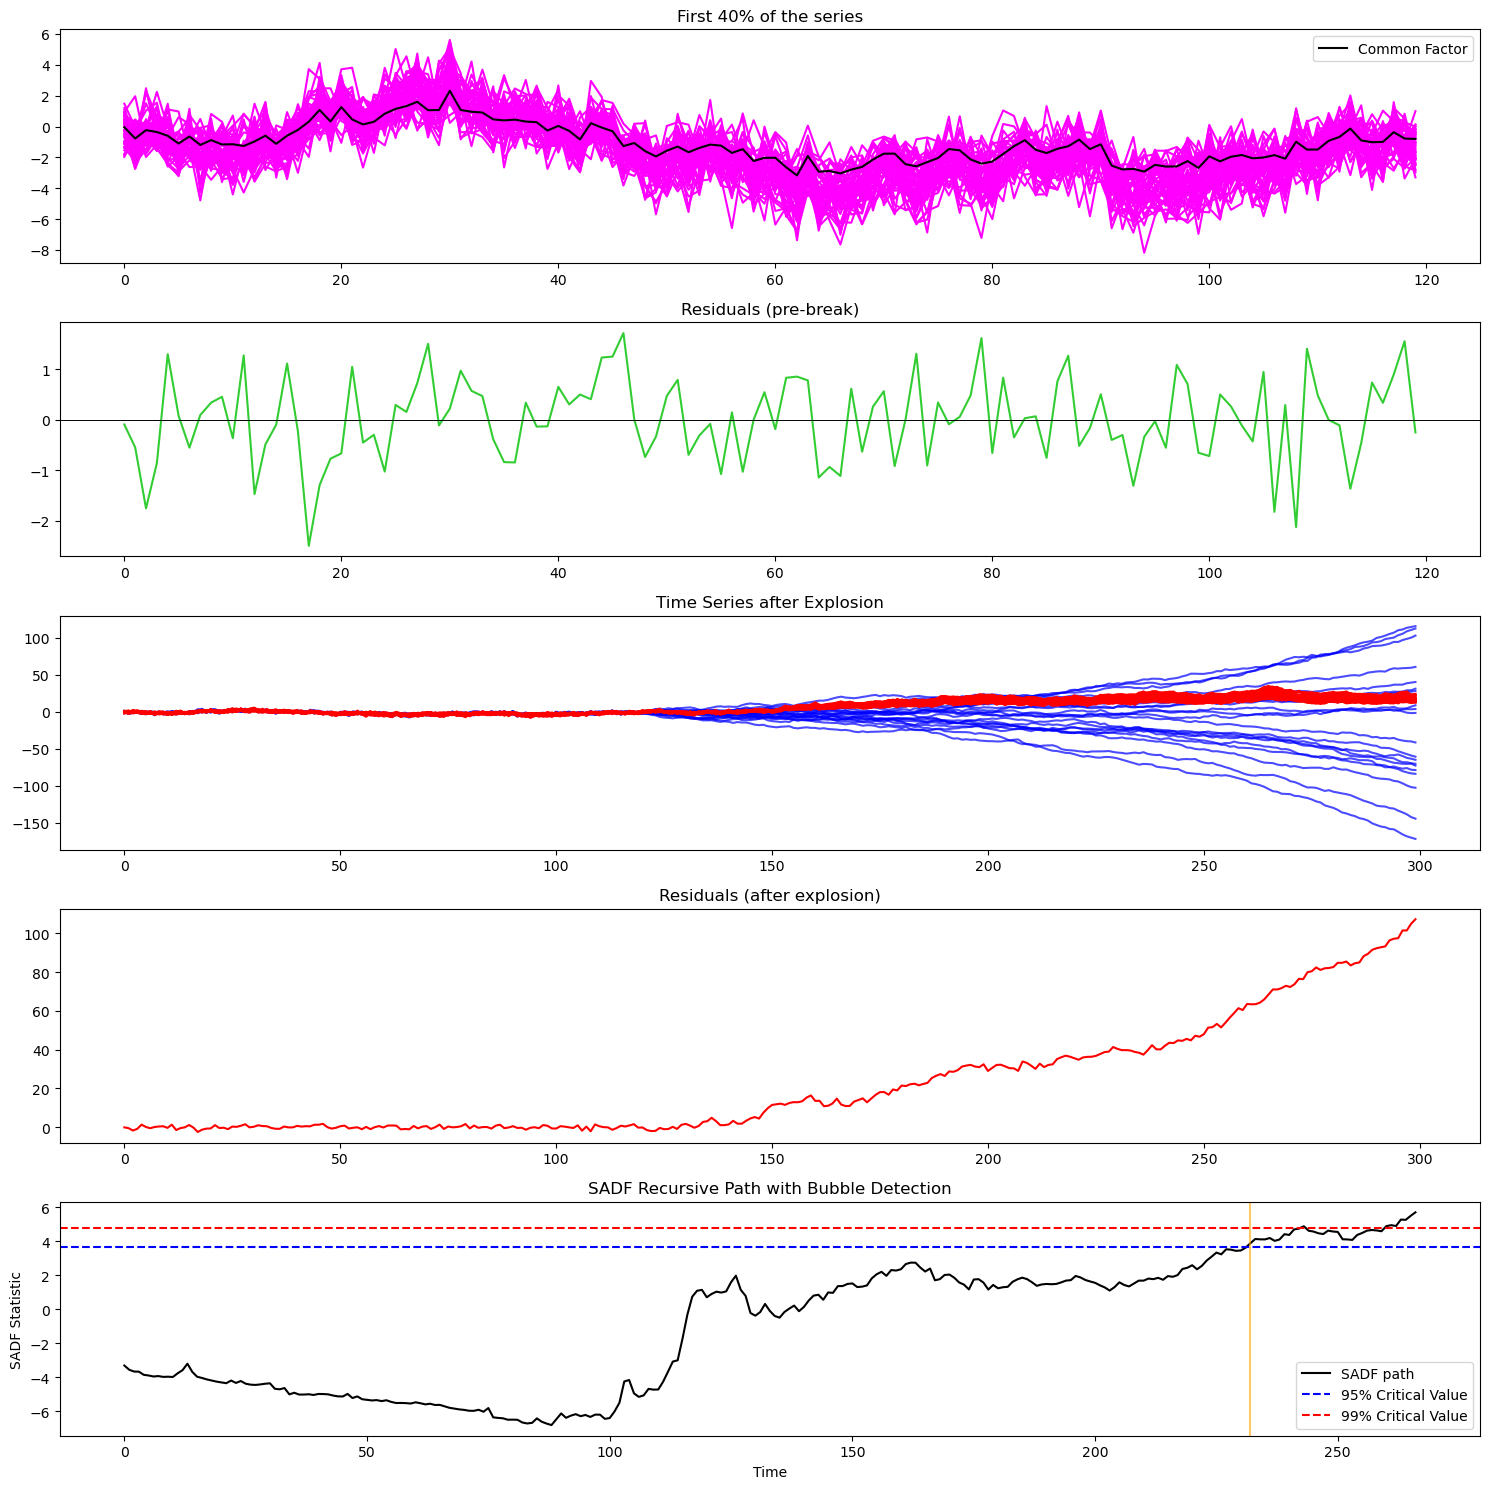

Time series is Explosive. SADF Value is: 5.7

Bubble starts at t=232
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [10]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [11]:
# 2 

In [12]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.634734
95%        3.123948
99%        4.055456


beta =  [-0.00260721  0.04284847 -0.06502234  0.05218296  0.05971772 -0.03844259
  0.16322202 -0.07021198  0.073957   -0.09221837 -0.07915126 -0.04517133
  0.01474365 -0.04187174  0.05627274  0.15067937  0.30601733 -0.01020974
  0.13045111  0.21718384  0.15368616 -0.02551425  0.10519082  0.06432206
 -0.01781789 -0.08599068  0.05887788  0.01878     0.02900032 -0.06668019
 -0.0595634   0.06016747 -0.02739171  0.00863442  0.01539067  0.00366013
 -0.0674189  -0.08231419 -0.19577373  0.16396441  0.11285577  0.02421159
  0.05308496  0.07658877 -0.12746407 -0.11851414  0.01786437 -0.01280835
 -0.06572494]
alpha =  0.0565
ADF on residuals  stat = -12.919


Time series is Non Explosive. SADF Value is: 2.93

Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [13]:
# 3

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

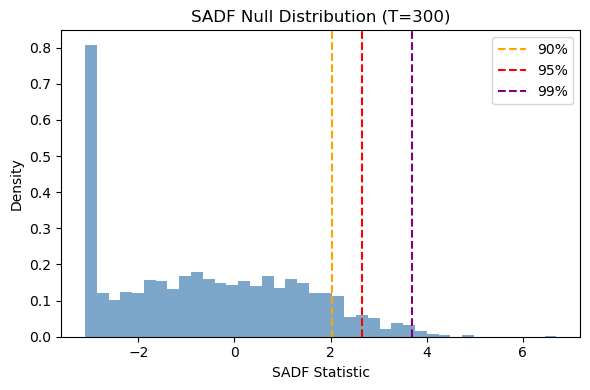

     Critical Value
90%        2.036548
95%        2.655071
99%        3.688461


beta =  [ 0.00406712  0.08218082 -0.01537449  0.0385011   0.05980502 -0.01864075
  0.13458382  0.01353118  0.09304373 -0.03552429 -0.01591256 -0.05232161
 -0.00995494 -0.03074556  0.0850393   0.04081779  0.22505408 -0.04786944
  0.09581308  0.09053106  0.05268217 -0.02369885  0.07573312  0.02984263
 -0.07576041 -0.02692337  0.02965299  0.02142293 -0.01163296  0.01629002
 -0.06278853  0.05602333 -0.06345844  0.02113436  0.09318547  0.01993589
 -0.07513668 -0.03507656 -0.14040509  0.17685826  0.09601808  0.00217619
  0.03047857  0.01765328 -0.11924155  0.0091806  -0.03083207  0.0560685
 -0.07496456]
alpha =  0.0526
ADF on residuals  stat = -15.916


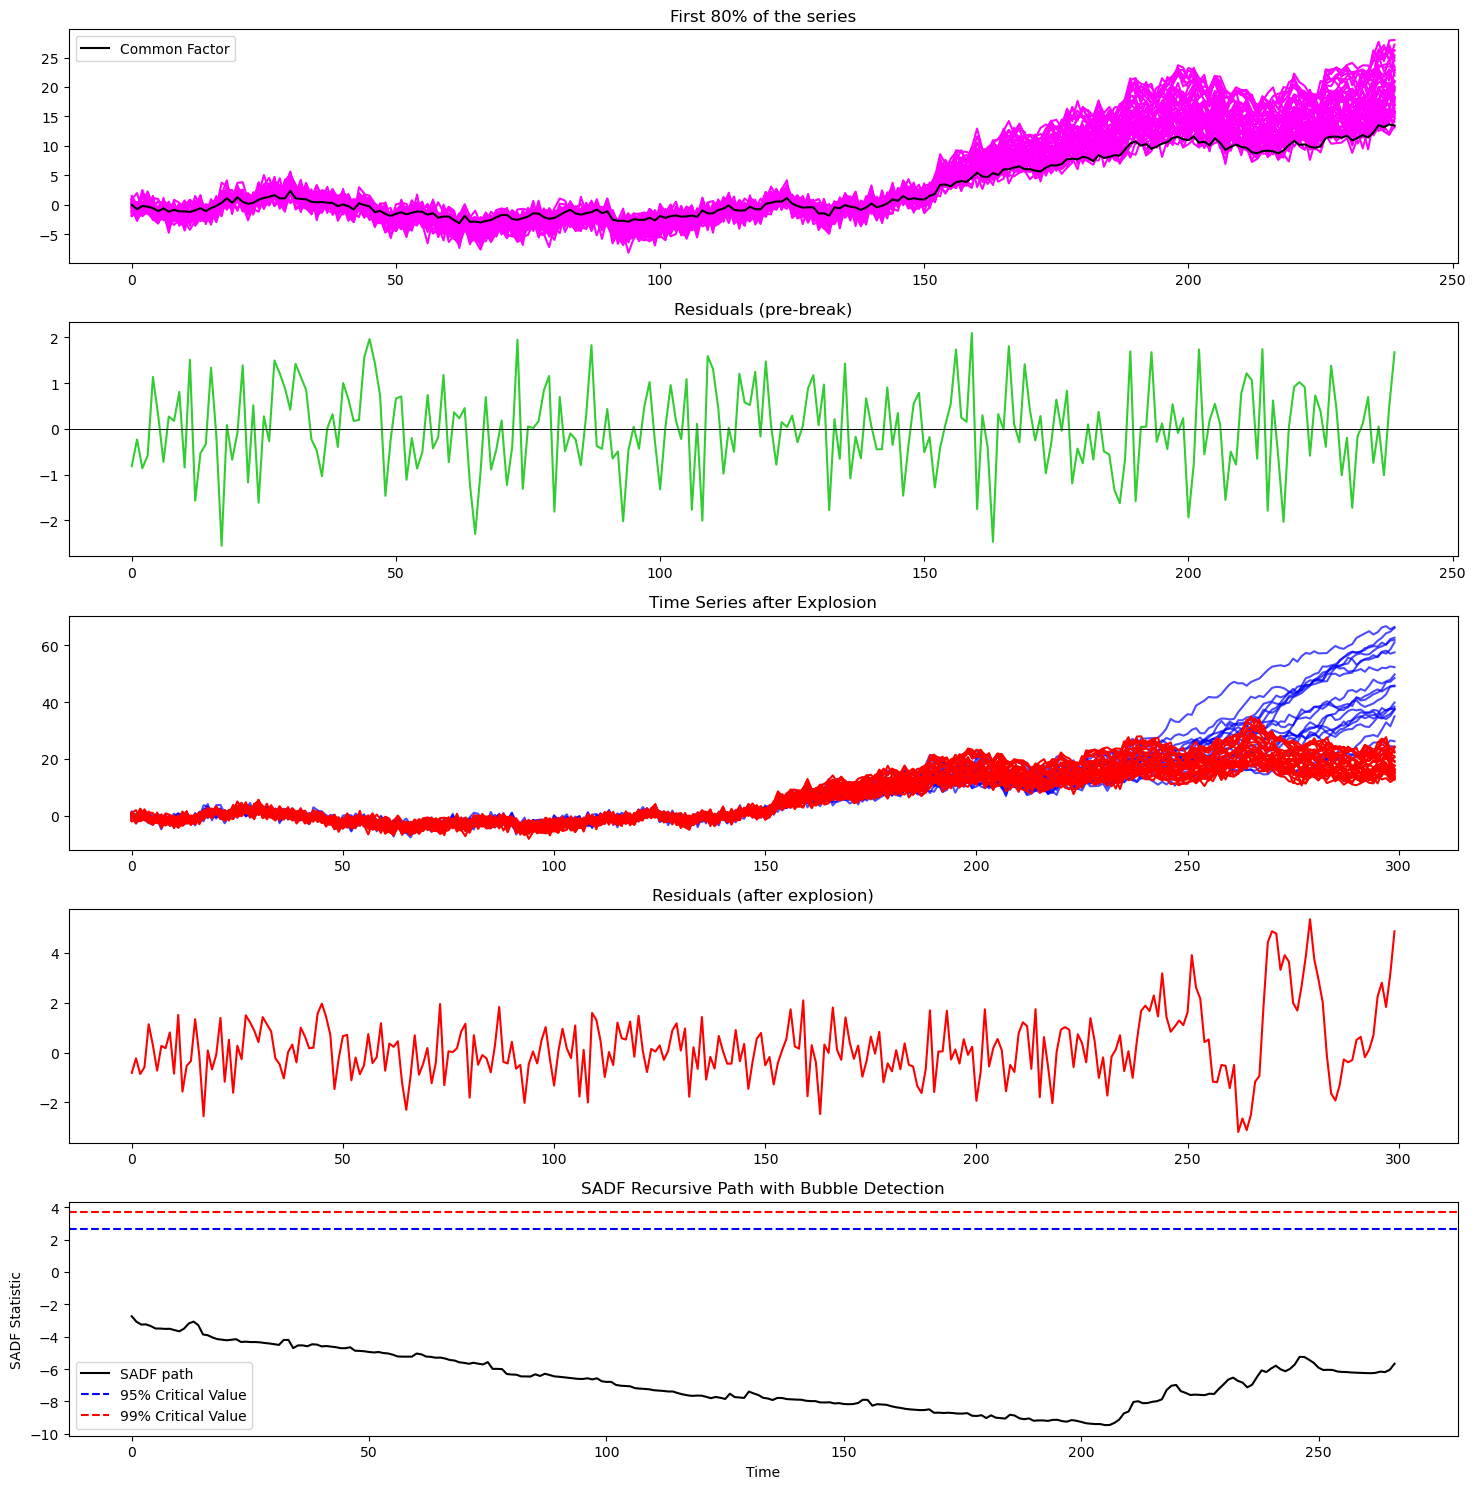

Time series is Non Explosive. SADF Value is: -2.74

Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [14]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 500

In [16]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [17]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [18]:
# 34

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

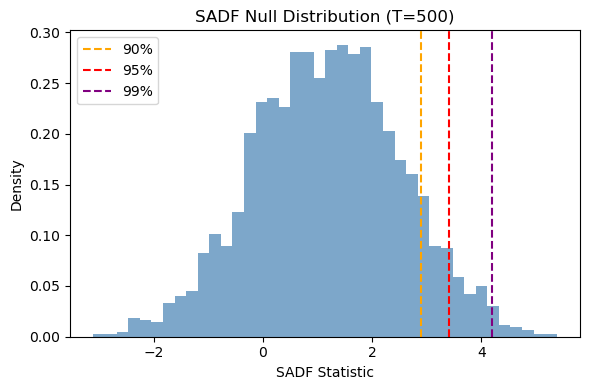

     Critical Value
90%        2.899533
95%        3.408083
99%        4.199632


beta =  [ 0.00500524  0.07415655 -0.01298481  0.02894828  0.02347508 -0.01201588
  0.12601674  0.01129168  0.07929993 -0.04053921 -0.08447569 -0.09450402
  0.00310339 -0.03067331  0.04994425  0.12522126  0.26662671 -0.0498824
  0.10711044  0.19080346  0.10026667 -0.07986404  0.13193072  0.08317849
 -0.0353327  -0.06912971  0.08530511  0.02924438 -0.01350046 -0.0445428
 -0.1196158   0.06947627 -0.0684736   0.00255945  0.07722271  0.01179931
 -0.05233291 -0.08505829 -0.13330763  0.13080471  0.06775839  0.00259986
  0.0691245   0.02542872 -0.1000048  -0.07385635 -0.03317045  0.0461455
 -0.05242005]
alpha =  0.0425
ADF on residuals  stat = -14.114


Time series is Non Explosive. SADF Value is: -1.89

Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [19]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [20]:
# 35

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

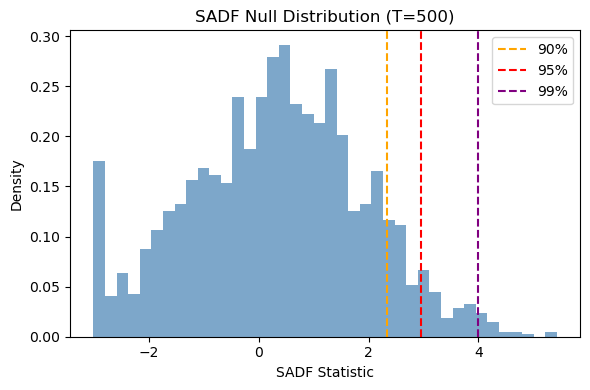

     Critical Value
90%        2.343004
95%        2.961119
99%        4.001830


beta =  [ 0.01766525  0.12407432 -0.02272354  0.03925598  0.0422662  -0.00483592
  0.11442396  0.04510136  0.11795247  0.05014406 -0.00924577 -0.05602817
 -0.03631917 -0.02879414  0.06814307  0.04517227  0.19790912 -0.07565598
  0.12441413  0.03513343  0.06088731 -0.04711264  0.01779715  0.01780082
 -0.07344646 -0.07064555 -0.00962659  0.02664094 -0.01685337  0.03660225
 -0.09965088  0.06999108 -0.04130753  0.03987383  0.14344969  0.0087521
 -0.05782271  0.02984506 -0.12259402  0.14731888  0.1004747  -0.05486669
  0.00515564  0.02568528 -0.12158227  0.02734759 -0.03816711  0.04403307
 -0.02215836]
alpha =  0.0741
ADF on residuals  stat = -17.628


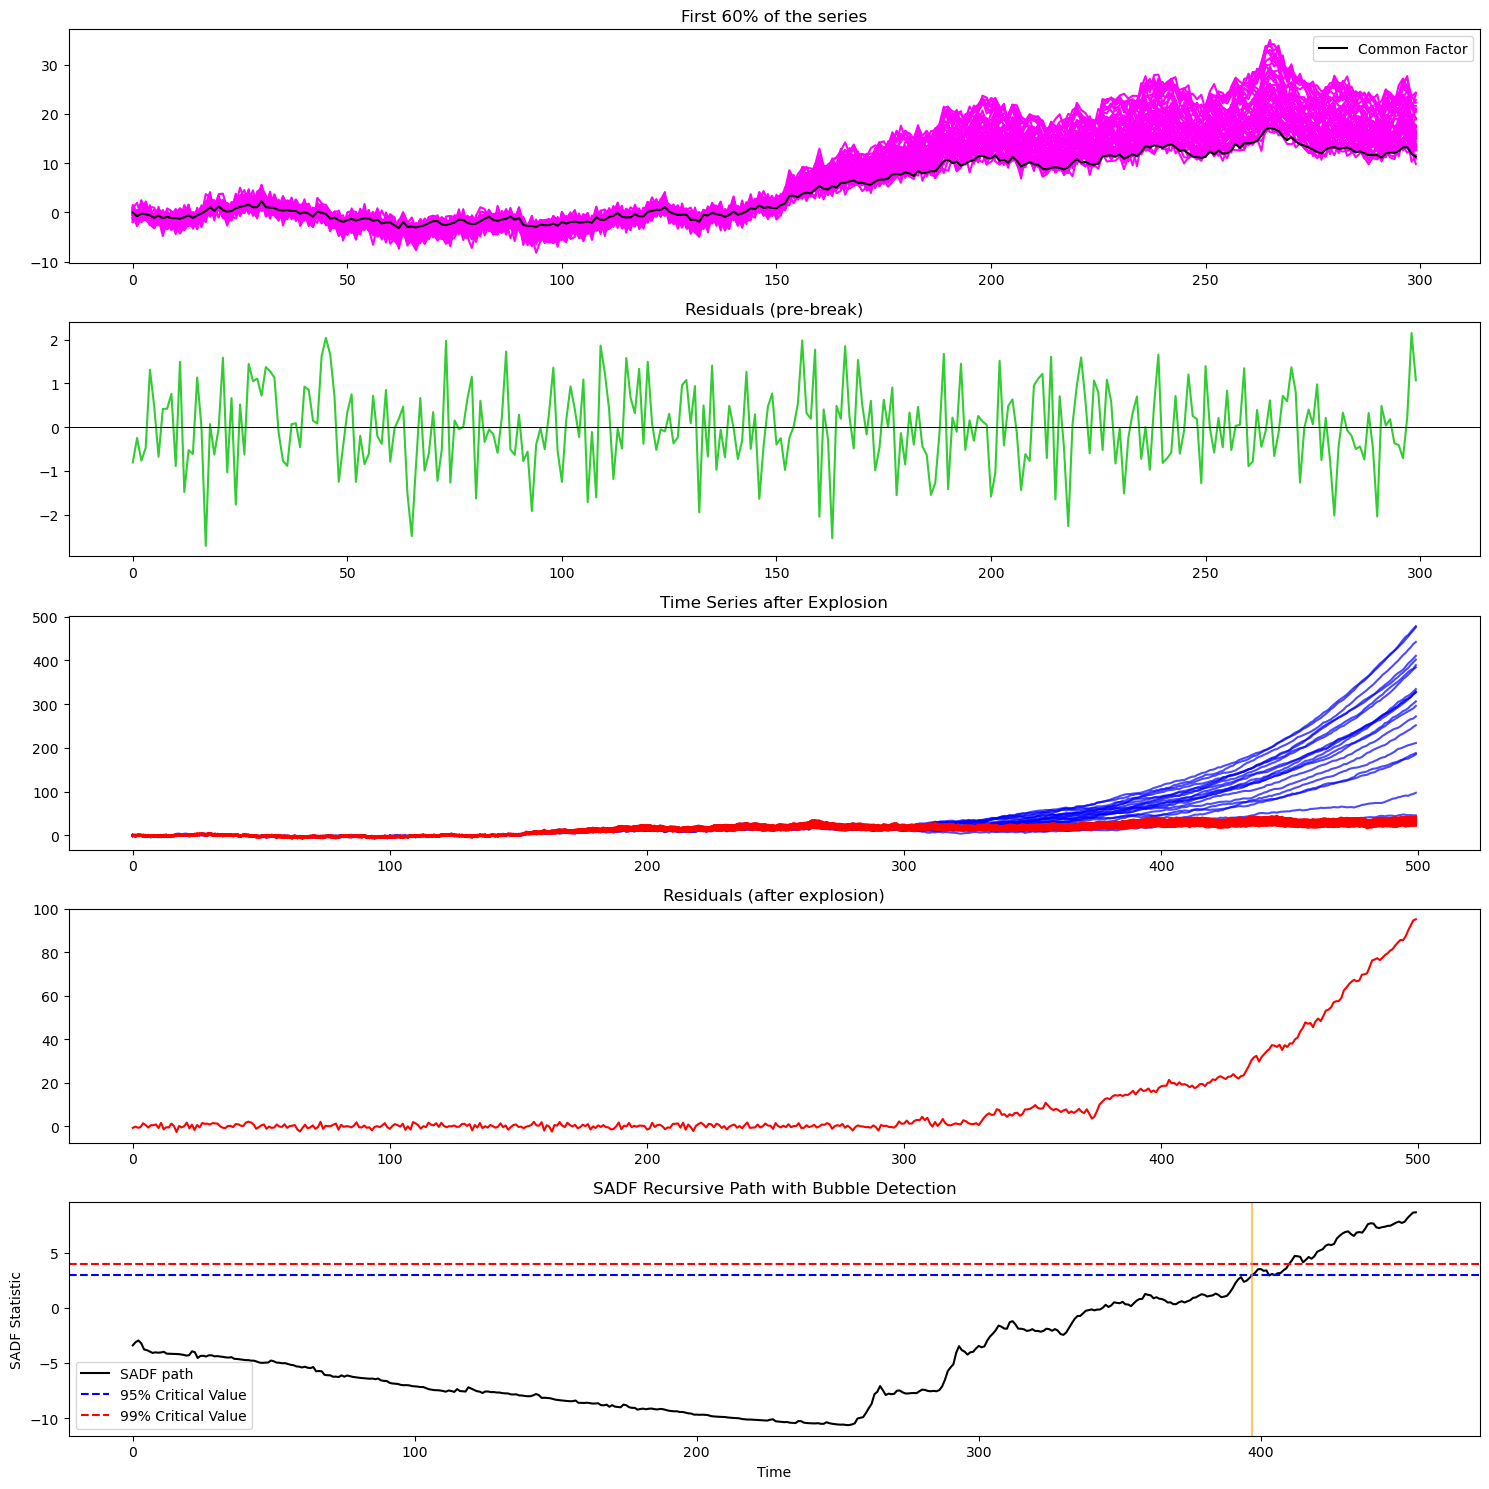

Time series is Explosive. SADF Value is: 8.65

Bubble starts at t=397
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [21]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [22]:
# 36

In [23]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        1.389588
95%        2.128402
99%        3.409114


beta =  [ 0.02050706  0.08172143 -0.01417933  0.08820064  0.00774616  0.00959475
  0.0761661   0.04665044  0.09381168  0.07363498 -0.03659287 -0.01904813
 -0.00740459 -0.04558532  0.03610944  0.01695577  0.1658046  -0.06736939
  0.10366523  0.07237719  0.00919821 -0.04505329  0.03572019 -0.02537292
 -0.08777022 -0.08073449  0.00227018  0.12249836 -0.00344996  0.01692387
 -0.04643796  0.05696    -0.00949933  0.02427295  0.12389415  0.06566043
 -0.07082967  0.08075488 -0.06103911  0.0836537   0.05051375 -0.04930554
  0.00480172  0.04862221 -0.08490617  0.00994214 -0.08752332  0.01132382
 -0.05776703]
alpha =  0.0404
ADF on residuals  stat = -19.949


Time series is Non Explosive. SADF Value is: -0.75

Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


## N = 800

In [25]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [26]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [27]:
# 67

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.663499
95%        3.113769
99%        4.022107


beta =  [-0.01571491  0.12430197  0.00144499  0.0528337   0.03427054  0.02040006
  0.12555696  0.05897847  0.11694603  0.06853262 -0.02730485 -0.0472977
 -0.02092399 -0.02191703  0.03077144  0.04240046  0.18538322 -0.04376465
  0.10300538  0.0541029   0.05042173 -0.04270948  0.00958257  0.01935049
 -0.08350391 -0.08053843 -0.02465499  0.05627792 -0.01245517  0.05555727
 -0.116428    0.03786648 -0.01679754  0.06384886  0.13332393  0.02207384
 -0.07123284  0.04117416 -0.08875348  0.11326118  0.08213812 -0.06162242
  0.00716094  0.01999793 -0.09876014  0.01465405 -0.03941976  0.02441747
 -0.03863248]
alpha =  0.0701
ADF on residuals  stat = -18.266


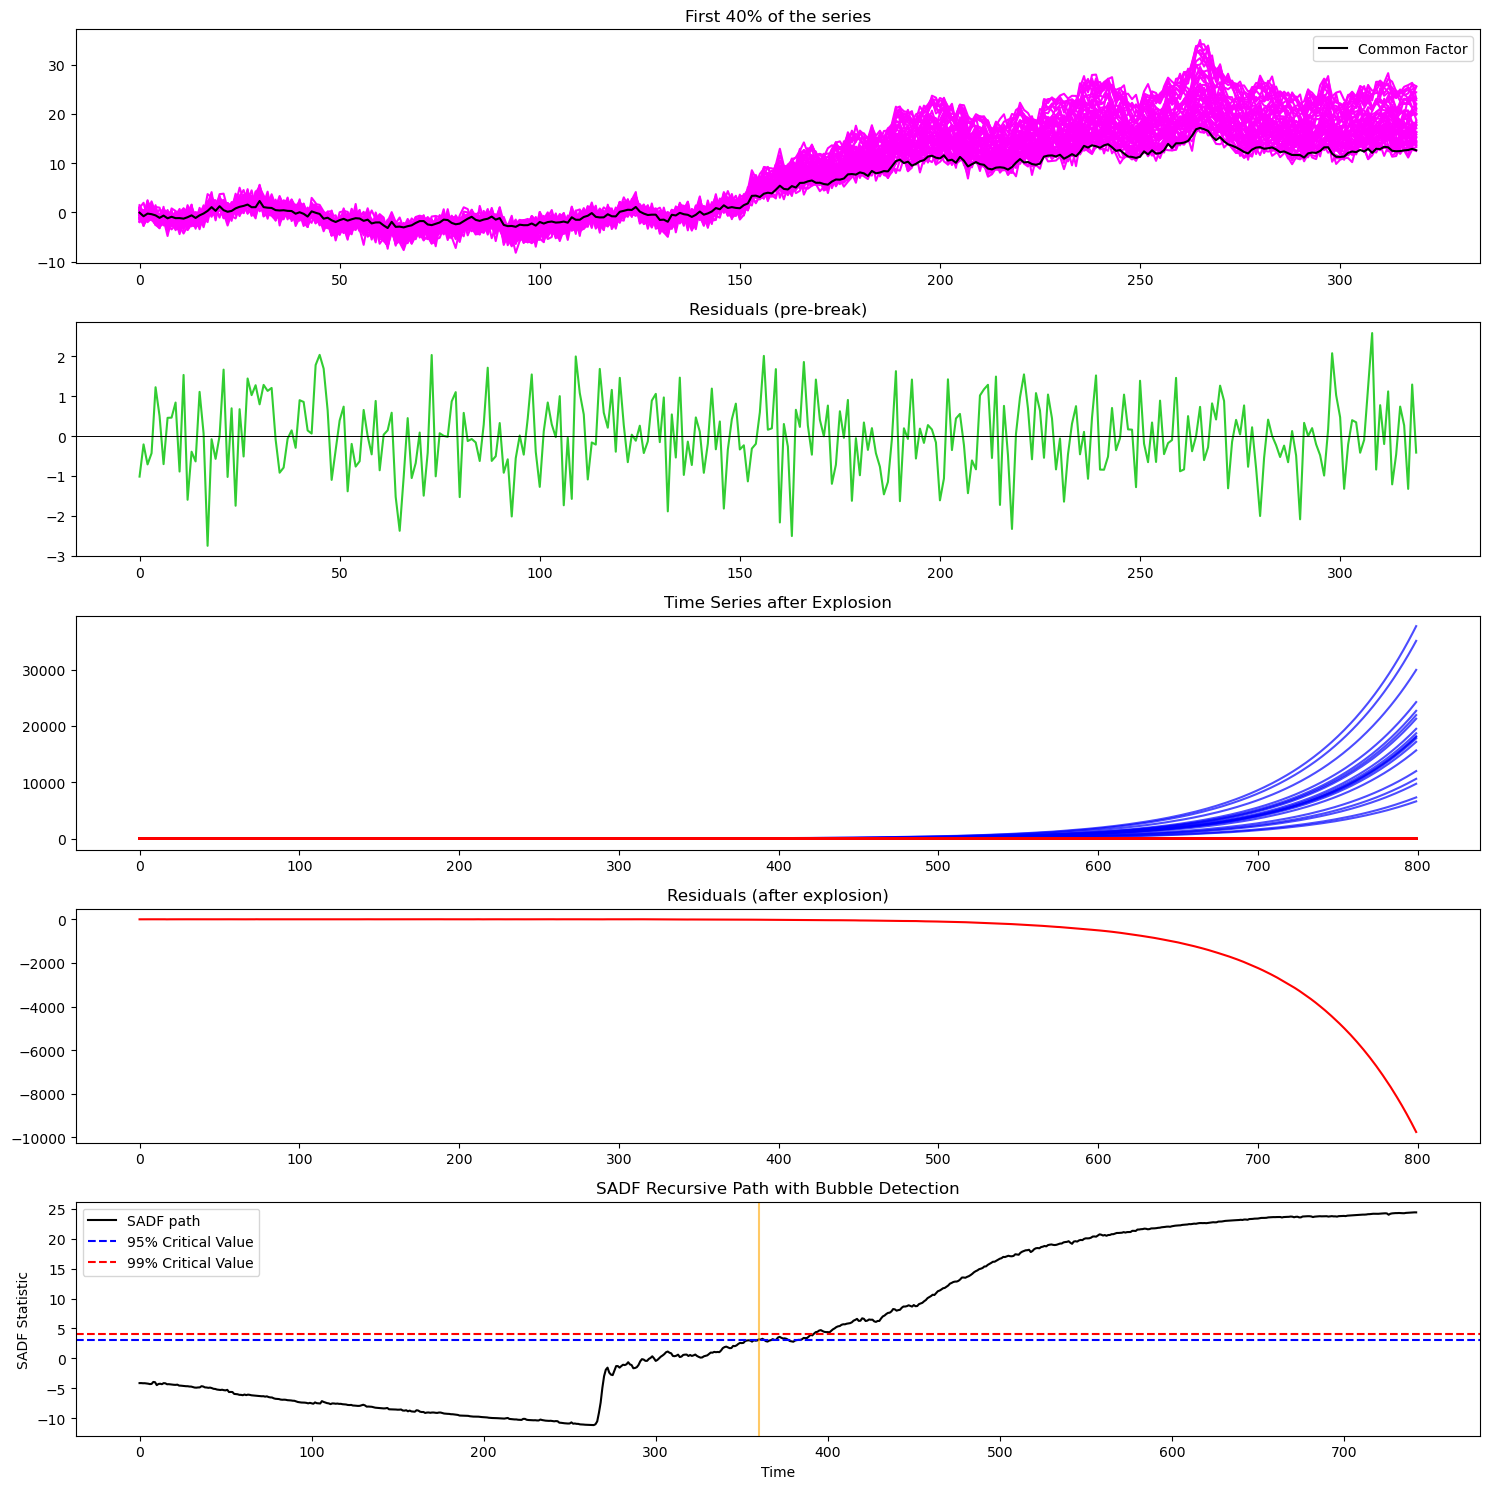

In [ ]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
# 68

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

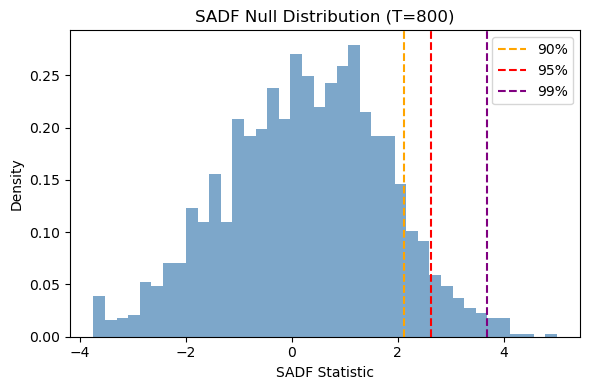

     Critical Value
90%        2.111451
95%        2.617043
99%        3.677177


beta =  [ 0.01306121  0.11203547 -0.00616377  0.05639229  0.0594747  -0.00275362
  0.09463632 -0.01708341  0.06396226  0.0618119  -0.03208241  0.00040788
 -0.01343269 -0.03099364  0.01370798 -0.00123044  0.16915601 -0.06594468
  0.05736304  0.07589239 -0.00806071 -0.02640216  0.04339747 -0.03768687
 -0.04944249 -0.10692359  0.02523965  0.09017563 -0.00623689  0.04256029
 -0.00451039  0.06219158  0.02266996  0.02178582  0.12410966  0.03893546
 -0.07944665  0.0529258  -0.01185303  0.07024191  0.06271263 -0.04189106
 -0.0116162   0.02434974 -0.07260846  0.04377586 -0.06757782  0.00622428
 -0.04698843]
alpha =  0.0107
ADF on residuals  stat = -21.338


Time series is Explosive. SADF Value is: 28.23

Bubble starts at t=491
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [30]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [31]:
# 69

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

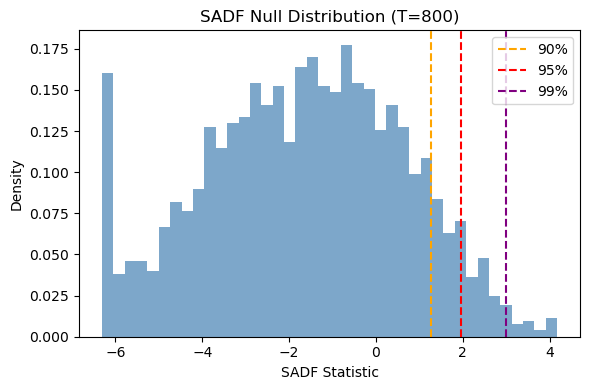

     Critical Value
90%        1.277112
95%        1.953980
99%        2.989038


beta =  [ 0.00784209  0.05068101  0.04377045  0.05769112  0.05148716 -0.00882652
  0.0649714  -0.01488659  0.05151751  0.06447965 -0.01180624  0.01088704
 -0.04455145  0.01230813  0.05189341  0.01470188  0.13944145 -0.01789704
  0.0511418   0.09570058 -0.02400104 -0.01335269  0.02688963 -0.00035907
 -0.0328825  -0.08485713  0.04432983  0.09100088 -0.00180829 -0.0078223
 -0.01060649  0.03182374  0.03558679  0.01428662  0.06304636  0.02232654
 -0.03961037  0.05013656 -0.04366204  0.08416619  0.02942447 -0.05175923
  0.00256085  0.0296299  -0.05014772  0.04351781 -0.07869237 -0.00850965
 -0.04049359]
alpha =  0.0079
ADF on residuals  stat = -25.469


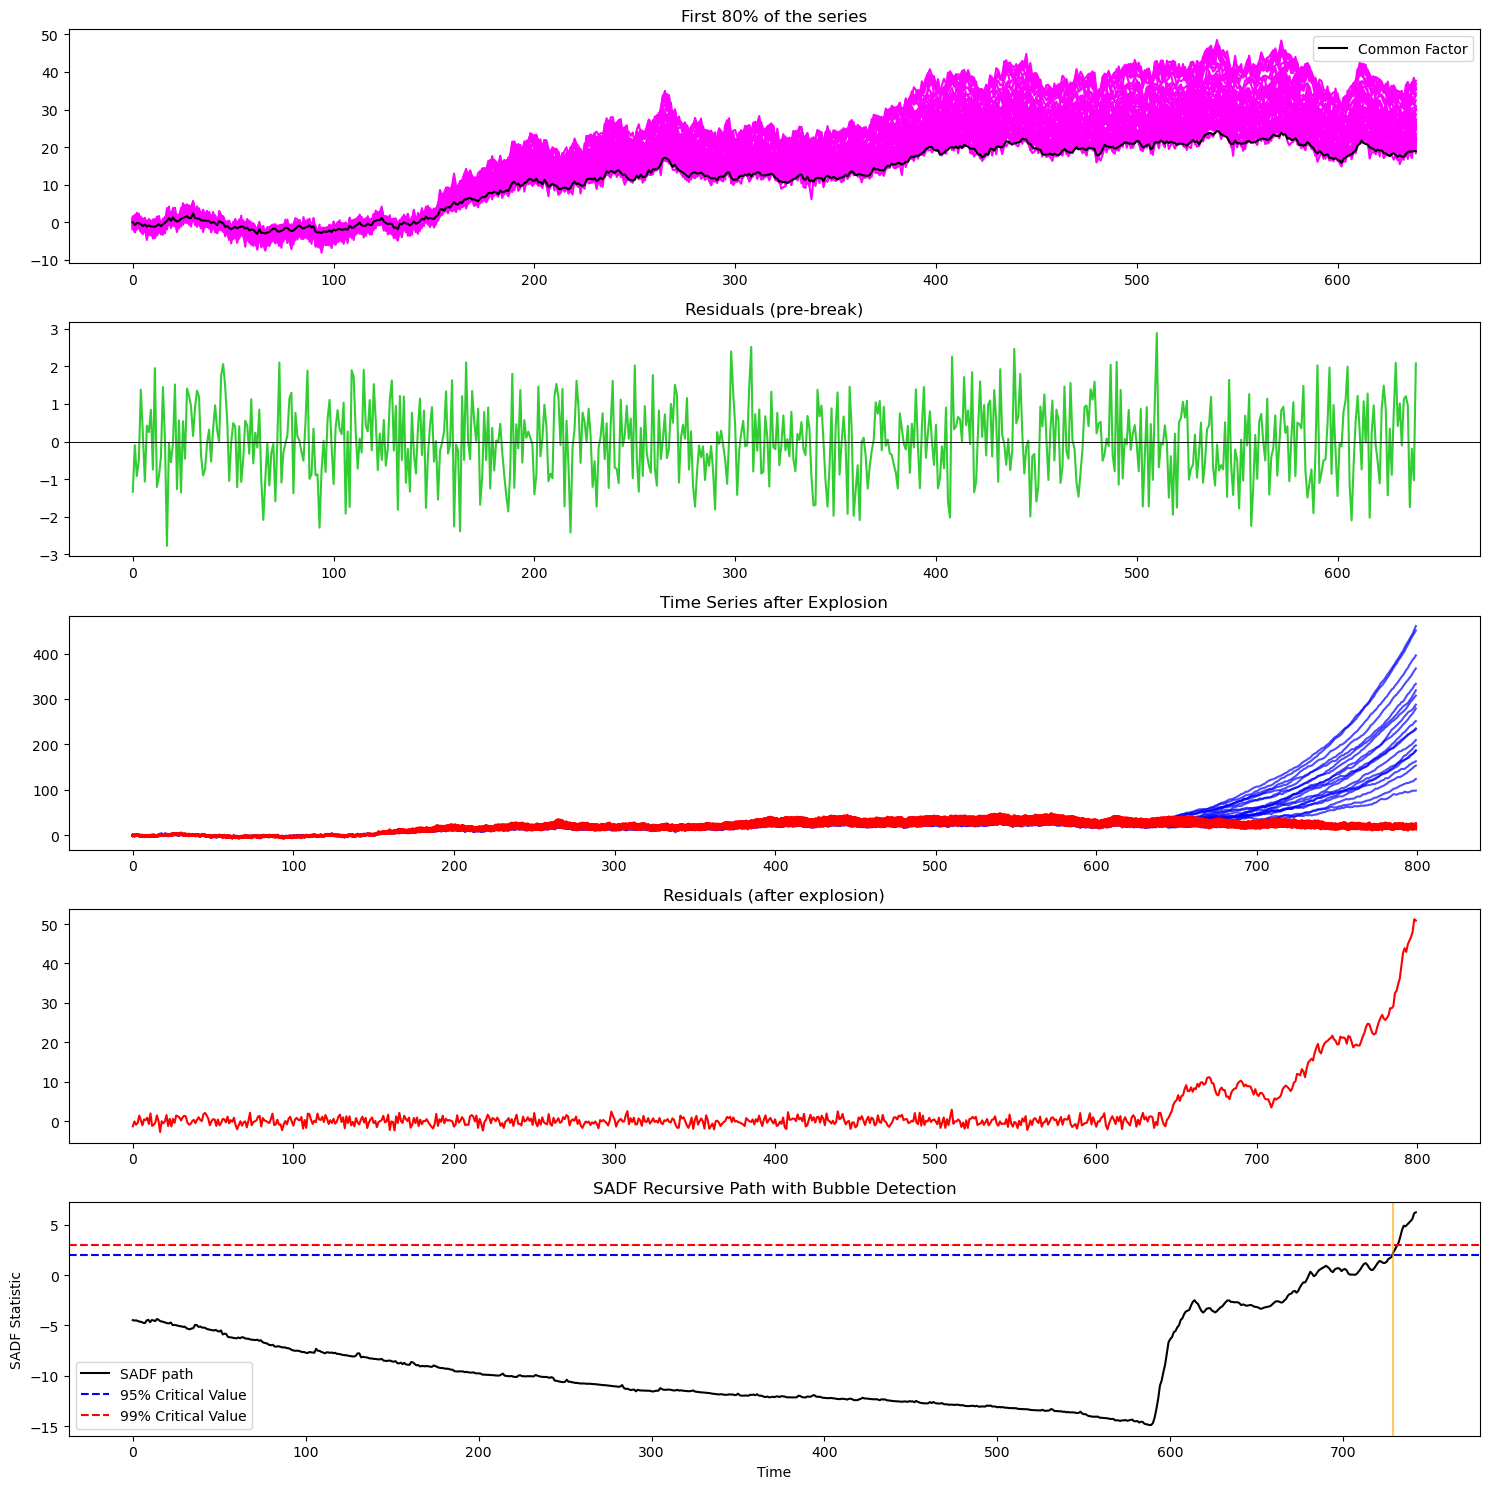

Time series is Explosive. SADF Value is: 6.22

Bubble starts at t=729
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [32]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 1000

In [34]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [35]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [36]:
# 100

In [37]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.550495
95%        2.990723
99%        3.983673


beta =  [ 0.02050706  0.08172143 -0.01417933  0.08820064  0.00774616  0.00959475
  0.0761661   0.04665044  0.09381168  0.07363498 -0.03659287 -0.01904813
 -0.00740459 -0.04558532  0.03610944  0.01695577  0.1658046  -0.06736939
  0.10366523  0.07237719  0.00919821 -0.04505329  0.03572019 -0.02537292
 -0.08777022 -0.08073449  0.00227018  0.12249836 -0.00344996  0.01692387
 -0.04643796  0.05696    -0.00949933  0.02427295  0.12389415  0.06566043
 -0.07082967  0.08075488 -0.06103911  0.0836537   0.05051375 -0.04930554
  0.00480172  0.04862221 -0.08490617  0.00994214 -0.08752332  0.01132382
 -0.05776703]
alpha =  0.0404
ADF on residuals  stat = -19.949


Time series is Explosive. SADF Value is: 28.96

Bubble starts at t=499
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [38]:
# 101

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

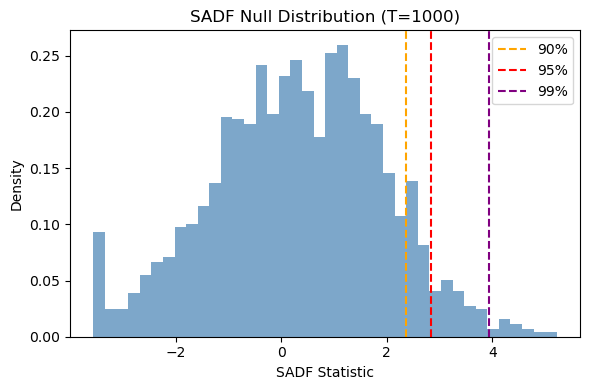

     Critical Value
90%        2.368463
95%        2.847337
99%        3.942513


beta =  [ 0.03209697  0.07580552  0.01429594  0.05541803  0.04816106 -0.02157533
  0.06479309  0.01183731  0.05868307  0.06429517 -0.00461304  0.00265923
 -0.03118036  0.01322674  0.04573759  0.00532853  0.13934191 -0.02207293
  0.04045295  0.07108647 -0.02675505 -0.02362147  0.04085267 -0.01776658
 -0.03598501 -0.09036162  0.05137489  0.08542952  0.01989349 -0.00520238
 -0.02085446  0.04135667  0.01403891  0.00595322  0.07400168  0.03699015
 -0.04351006  0.05368945 -0.06019038  0.08969479  0.02127885 -0.03458343
  0.00377465  0.03000493 -0.04611462  0.02991005 -0.10039015  0.01190646
 -0.02905746]
alpha =  0.0172
ADF on residuals  stat = -25.174


Time series is Explosive. SADF Value is: 31.04

Bubble starts at t=656
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [39]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [40]:
# 102

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

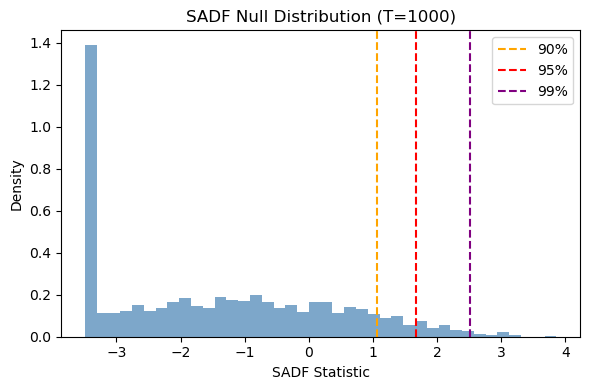

     Critical Value
90%        1.069792
95%        1.672020
99%        2.507453


beta =  [ 0.0053662   0.03290056  0.01012171  0.03899057  0.03437636  0.00788023
  0.02471822  0.00143656  0.06119651  0.08068659 -0.01458302 -0.00306445
 -0.05336349 -0.00372004  0.04145808  0.03220646  0.13006389  0.00490498
  0.03421589  0.06570227 -0.01557132 -0.02048134  0.01057297  0.00781411
 -0.00542006 -0.04735214  0.03015016  0.093731    0.01662464 -0.01841295
  0.02243473  0.02151926  0.02785842  0.01166725  0.05966885  0.01977403
 -0.01341062  0.0132098  -0.01996646  0.09216746  0.01742559 -0.03613079
  0.01766717  0.04131115 -0.06242826  0.05229976 -0.03639878  0.00942437
 -0.07052283]
alpha =  0.0127
ADF on residuals  stat = -29.190


Time series is Explosive. SADF Value is: 13.55

Bubble starts at t=870
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [41]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

### Number of Bubble Series 60%

In [43]:
num_of_rw = 0.6

## N = 300

In [45]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [46]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.987504
95%        3.460407
99%        4.346376


beta =  [ 0.18767027  0.0934667  -0.09036358  0.08417488  0.18543635 -0.03806102
  0.09570217 -0.14874708  0.07867073 -0.0195521  -0.02644254  0.06773103
  0.01348517  0.02874802 -0.04820017  0.17707355  0.33667859 -0.10691344
  0.18431219  0.13574206  0.10149995 -0.03975736  0.09707387  0.03382395
  0.00581374 -0.08559224  0.002934   -0.03646593  0.07017369 -0.05585792
 -0.09259153  0.05421273  0.02428042  0.08728421  0.00751133 -0.01084461
 -0.15069641 -0.13351963 -0.22394517  0.09866543  0.19744813  0.08075086
  0.10558439  0.03717084 -0.12116832 -0.27562612  0.02970323  0.02295417
 -0.02088159]
alpha =  0.2174
ADF on residuals  stat = -10.048


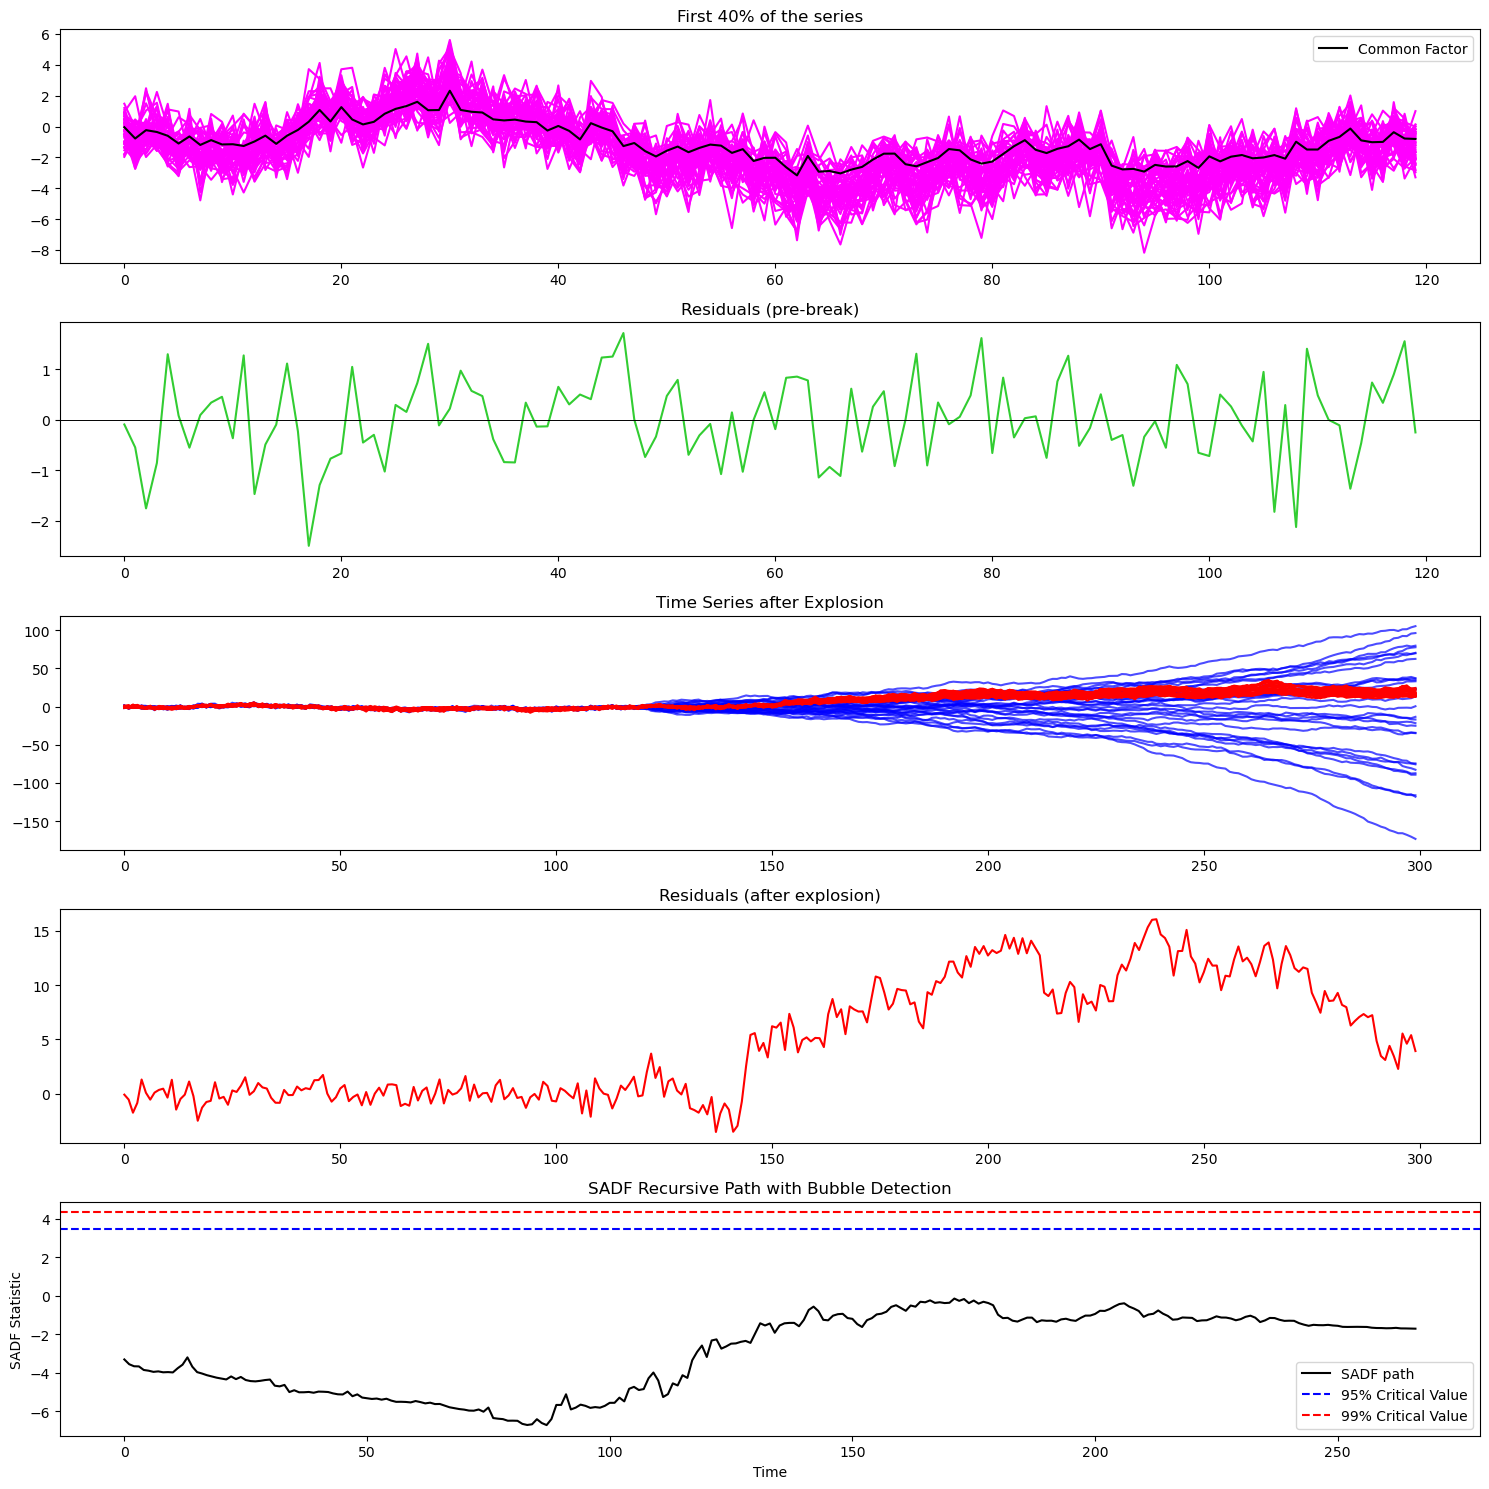

Time series is Non Explosive. SADF Value is: -0.14

Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [47]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |█████████████████████████████-| 99% --- 1989/2000

In [ ]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 500

In [ ]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [ ]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [ ]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 800

In [ ]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [ ]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

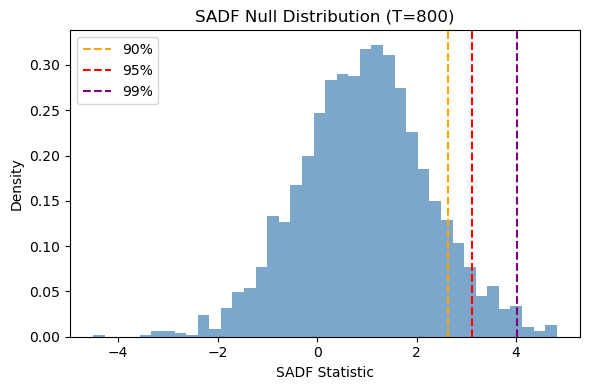

     Critical Value
90%        2.623151
95%        3.120558
99%        4.015115


beta =  [-0.01571491  0.12430197  0.00144499  0.0528337   0.03427054  0.02040006
  0.12555696  0.05897847  0.11694603  0.06853262 -0.02730485 -0.0472977
 -0.02092399 -0.02191703  0.03077144  0.04240046  0.18538322 -0.04376465
  0.10300538  0.0541029   0.05042173 -0.04270948  0.00958257  0.01935049
 -0.08350391 -0.08053843 -0.02465499  0.05627792 -0.01245517  0.05555727
 -0.116428    0.03786648 -0.01679754  0.06384886  0.13332393  0.02207384
 -0.07123284  0.04117416 -0.08875348  0.11326118  0.08213812 -0.06162242
  0.00716094  0.01999793 -0.09876014  0.01465405 -0.03941976  0.02441747
 -0.03863248]
alpha =  0.0701
ADF on residuals  stat = -18.266


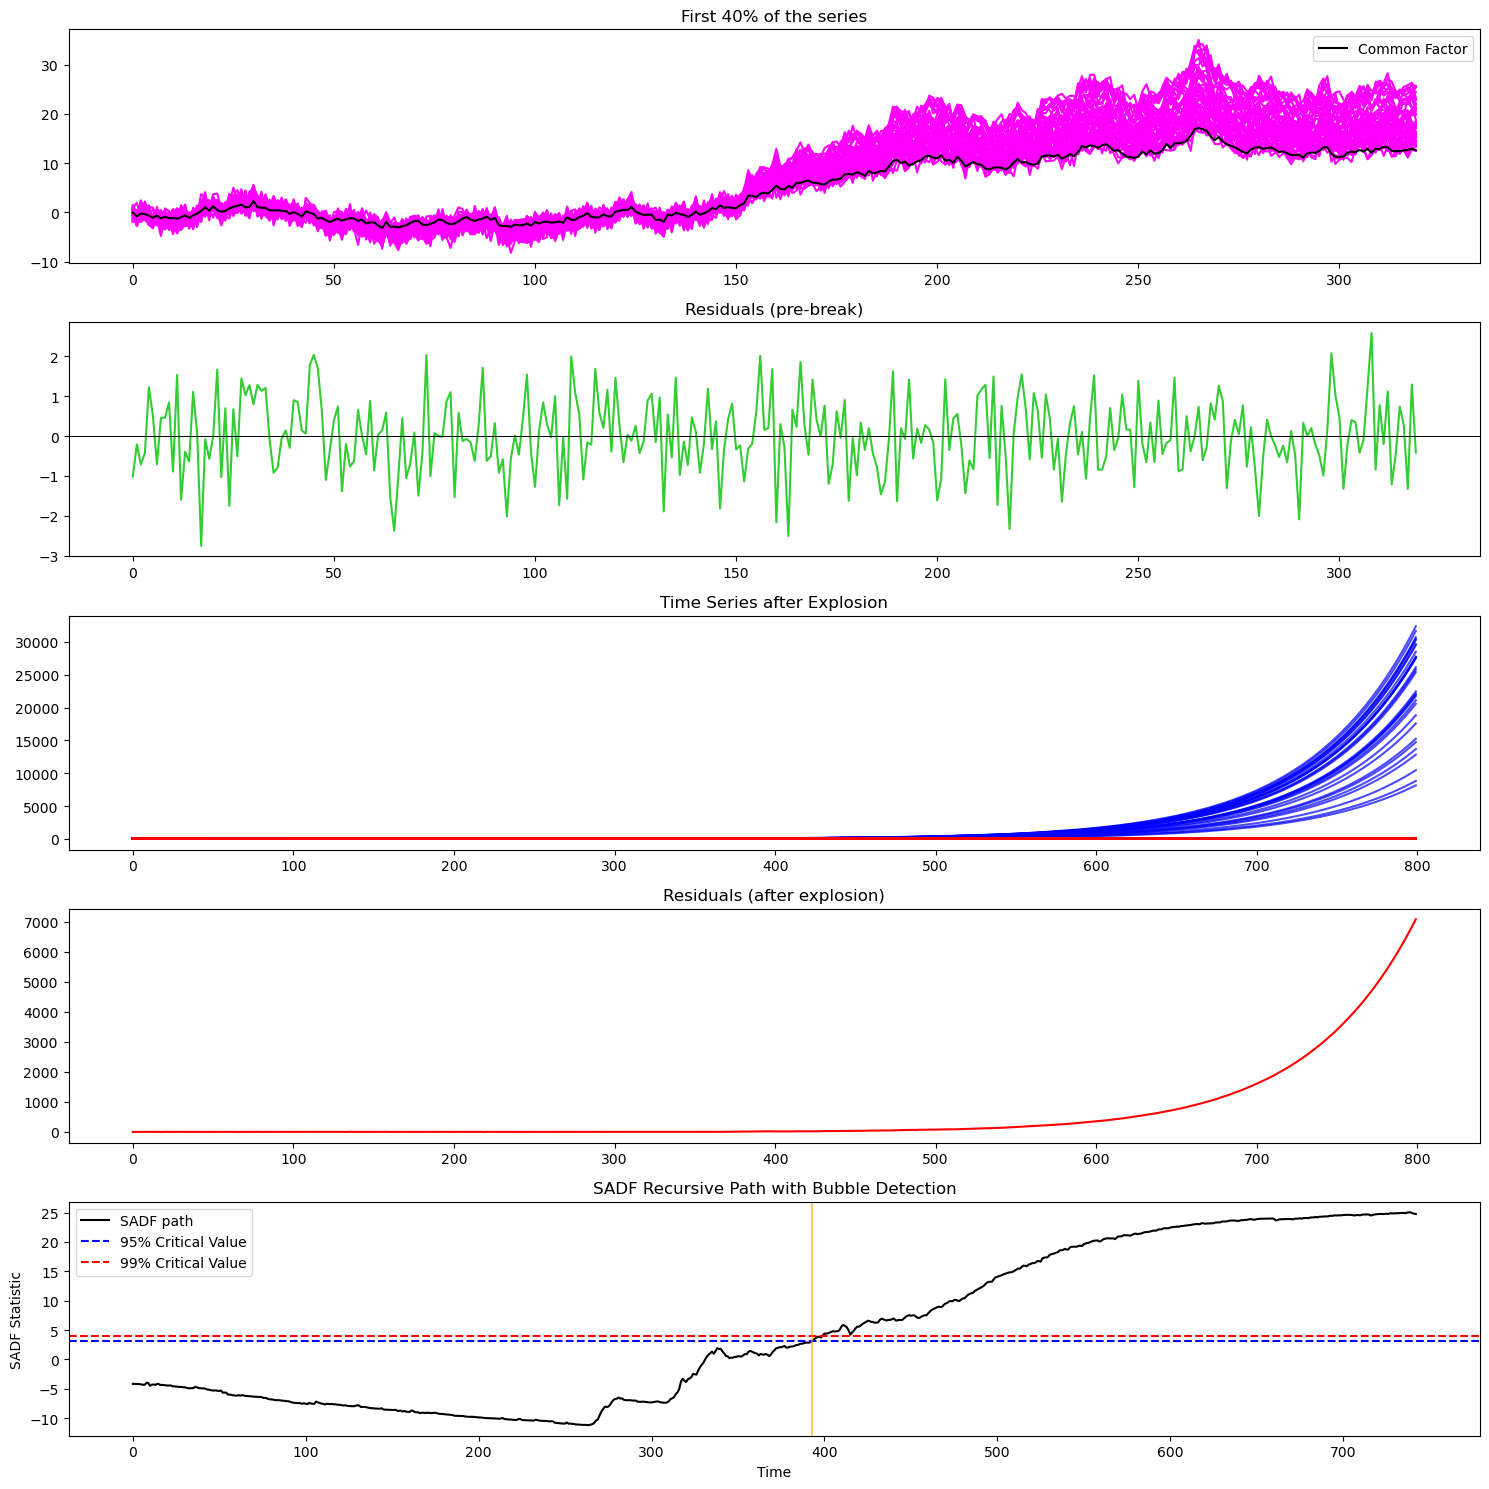

Time series is Explosive. SADF Value is: 25.05

Bubble starts at t=393
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [59]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

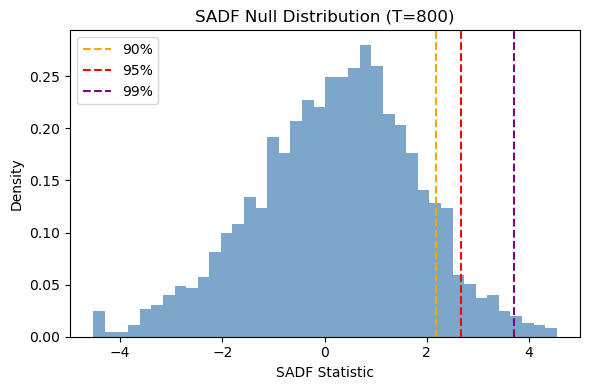

     Critical Value
90%        2.182480
95%        2.674991
99%        3.700099


beta =  [ 0.01306121  0.11203547 -0.00616377  0.05639229  0.0594747  -0.00275362
  0.09463632 -0.01708341  0.06396226  0.0618119  -0.03208241  0.00040788
 -0.01343269 -0.03099364  0.01370798 -0.00123044  0.16915601 -0.06594468
  0.05736304  0.07589239 -0.00806071 -0.02640216  0.04339747 -0.03768687
 -0.04944249 -0.10692359  0.02523965  0.09017563 -0.00623689  0.04256029
 -0.00451039  0.06219158  0.02266996  0.02178582  0.12410966  0.03893546
 -0.07944665  0.0529258  -0.01185303  0.07024191  0.06271263 -0.04189106
 -0.0116162   0.02434974 -0.07260846  0.04377586 -0.06757782  0.00622428
 -0.04698843]
alpha =  0.0107
ADF on residuals  stat = -21.338


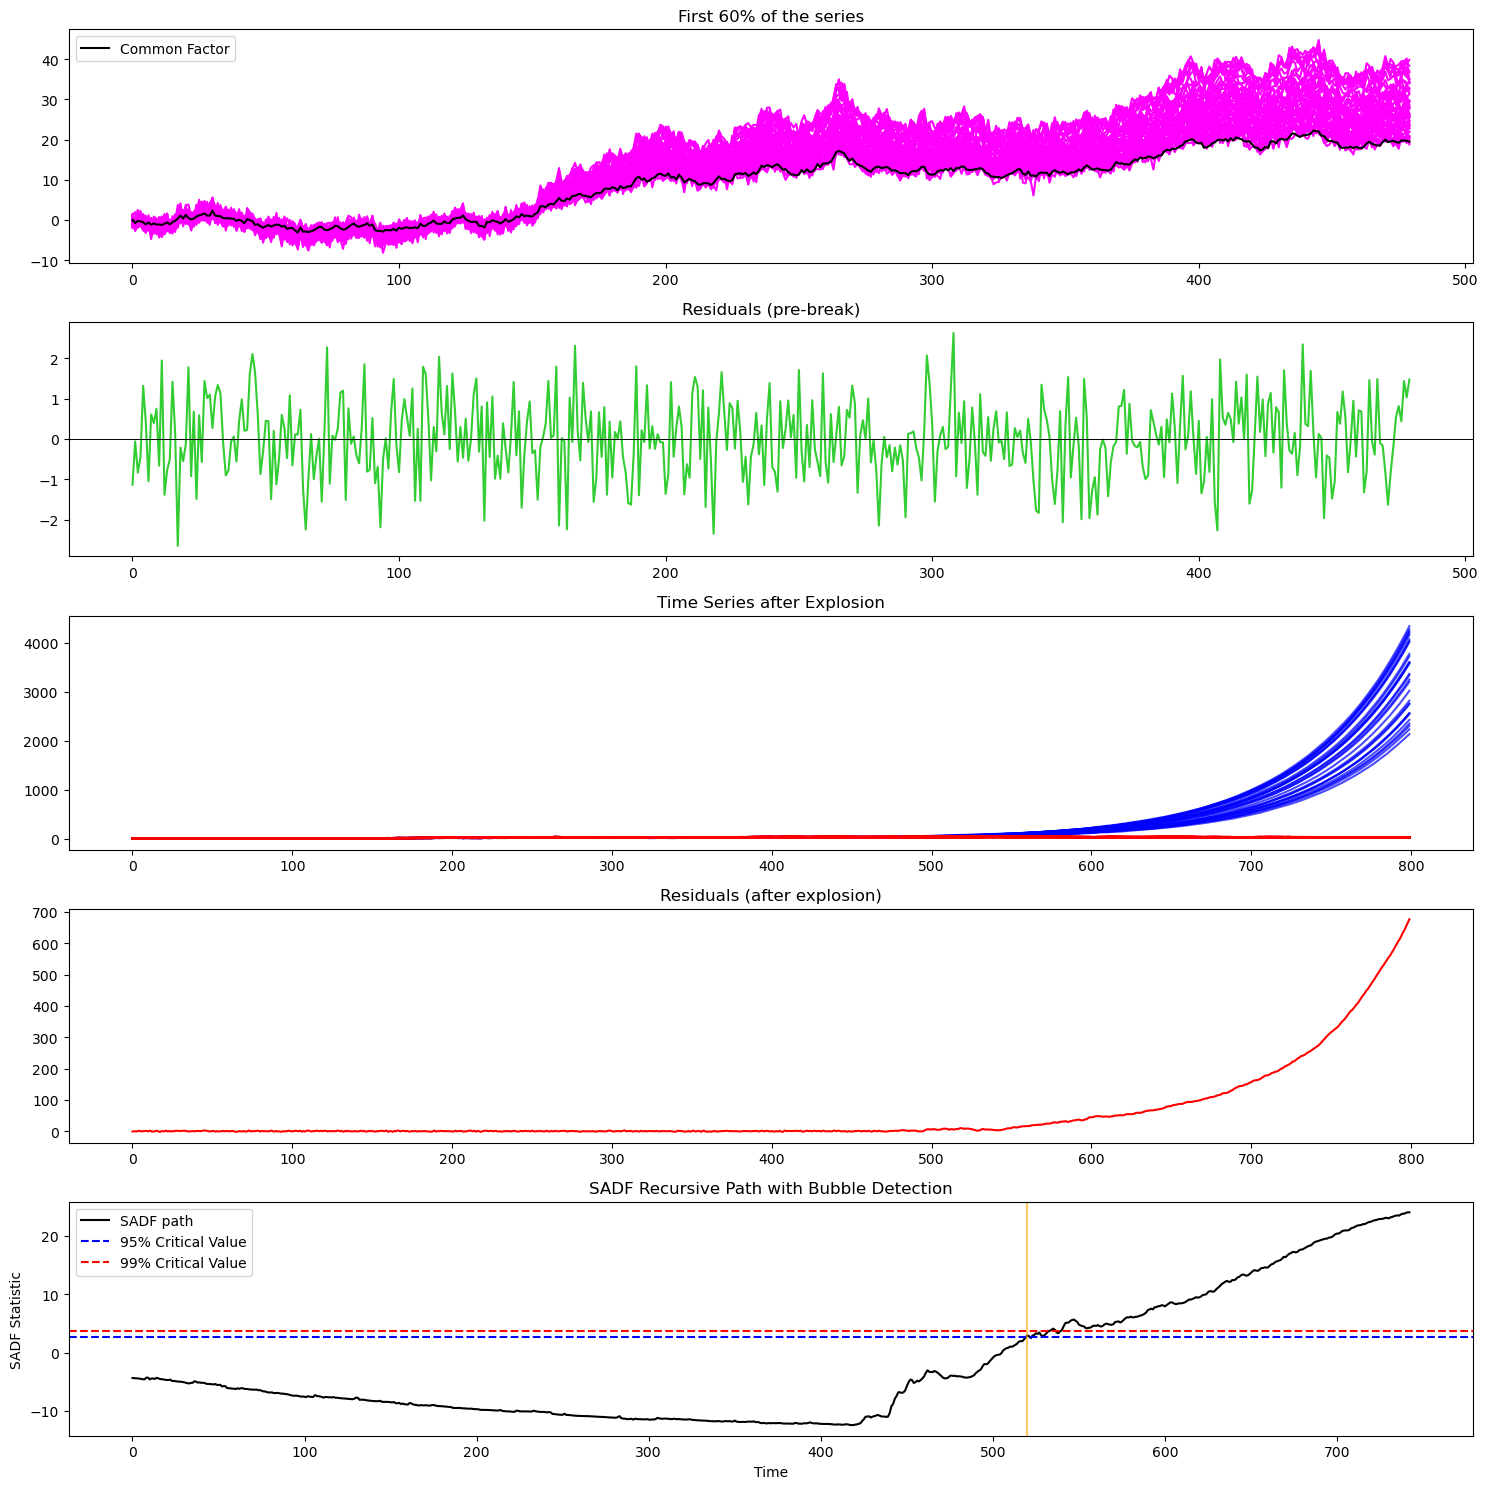

Time series is Explosive. SADF Value is: 24.05

Bubble starts at t=520
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [60]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

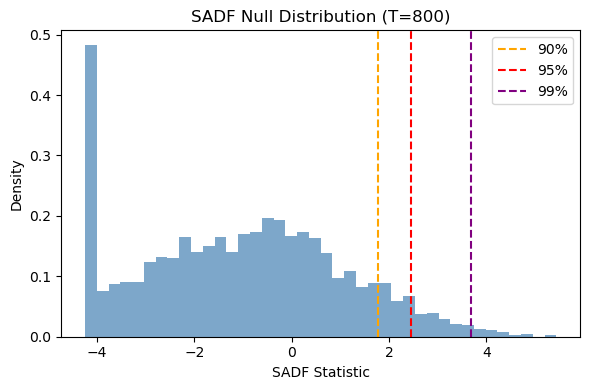

     Critical Value
90%        1.779571
95%        2.444868
99%        3.678778


beta =  [ 0.00784209  0.05068101  0.04377045  0.05769112  0.05148716 -0.00882652
  0.0649714  -0.01488659  0.05151751  0.06447965 -0.01180624  0.01088704
 -0.04455145  0.01230813  0.05189341  0.01470188  0.13944145 -0.01789704
  0.0511418   0.09570058 -0.02400104 -0.01335269  0.02688963 -0.00035907
 -0.0328825  -0.08485713  0.04432983  0.09100088 -0.00180829 -0.0078223
 -0.01060649  0.03182374  0.03558679  0.01428662  0.06304636  0.02232654
 -0.03961037  0.05013656 -0.04366204  0.08416619  0.02942447 -0.05175923
  0.00256085  0.0296299  -0.05014772  0.04351781 -0.07869237 -0.00850965
 -0.04049359]
alpha =  0.0079
ADF on residuals  stat = -25.469


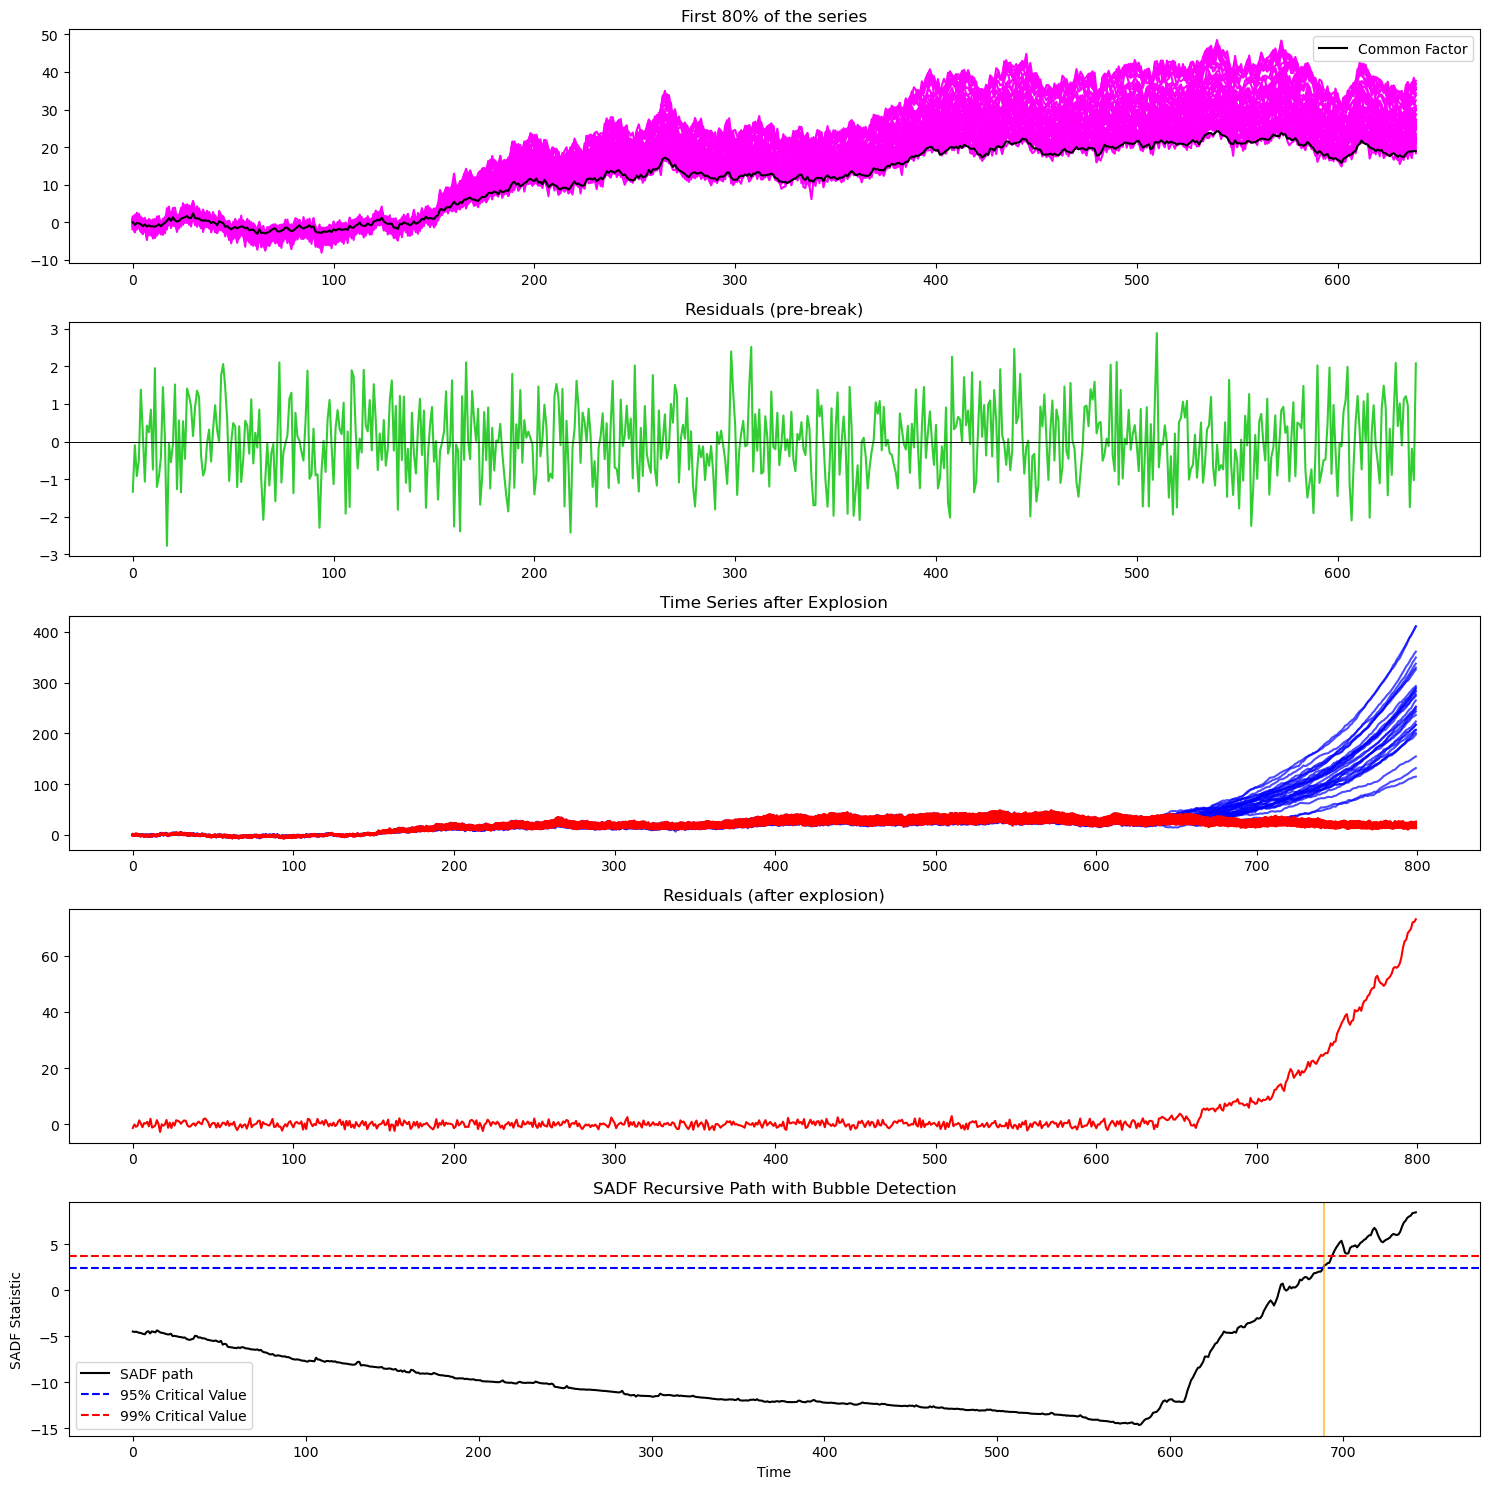

Time series is Explosive. SADF Value is: 8.47

Bubble starts at t=689
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [61]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 1000

In [63]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [64]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

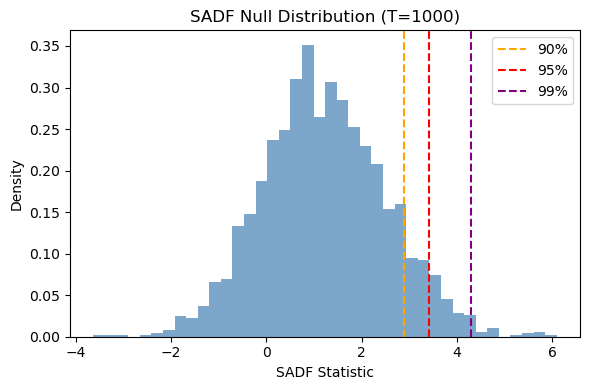

     Critical Value
90%        2.897092
95%        3.424038
99%        4.294253


beta =  [ 0.02050706  0.08172143 -0.01417933  0.08820064  0.00774616  0.00959475
  0.0761661   0.04665044  0.09381168  0.07363498 -0.03659287 -0.01904813
 -0.00740459 -0.04558532  0.03610944  0.01695577  0.1658046  -0.06736939
  0.10366523  0.07237719  0.00919821 -0.04505329  0.03572019 -0.02537292
 -0.08777022 -0.08073449  0.00227018  0.12249836 -0.00344996  0.01692387
 -0.04643796  0.05696    -0.00949933  0.02427295  0.12389415  0.06566043
 -0.07082967  0.08075488 -0.06103911  0.0836537   0.05051375 -0.04930554
  0.00480172  0.04862221 -0.08490617  0.00994214 -0.08752332  0.01132382
 -0.05776703]
alpha =  0.0404
ADF on residuals  stat = -19.949


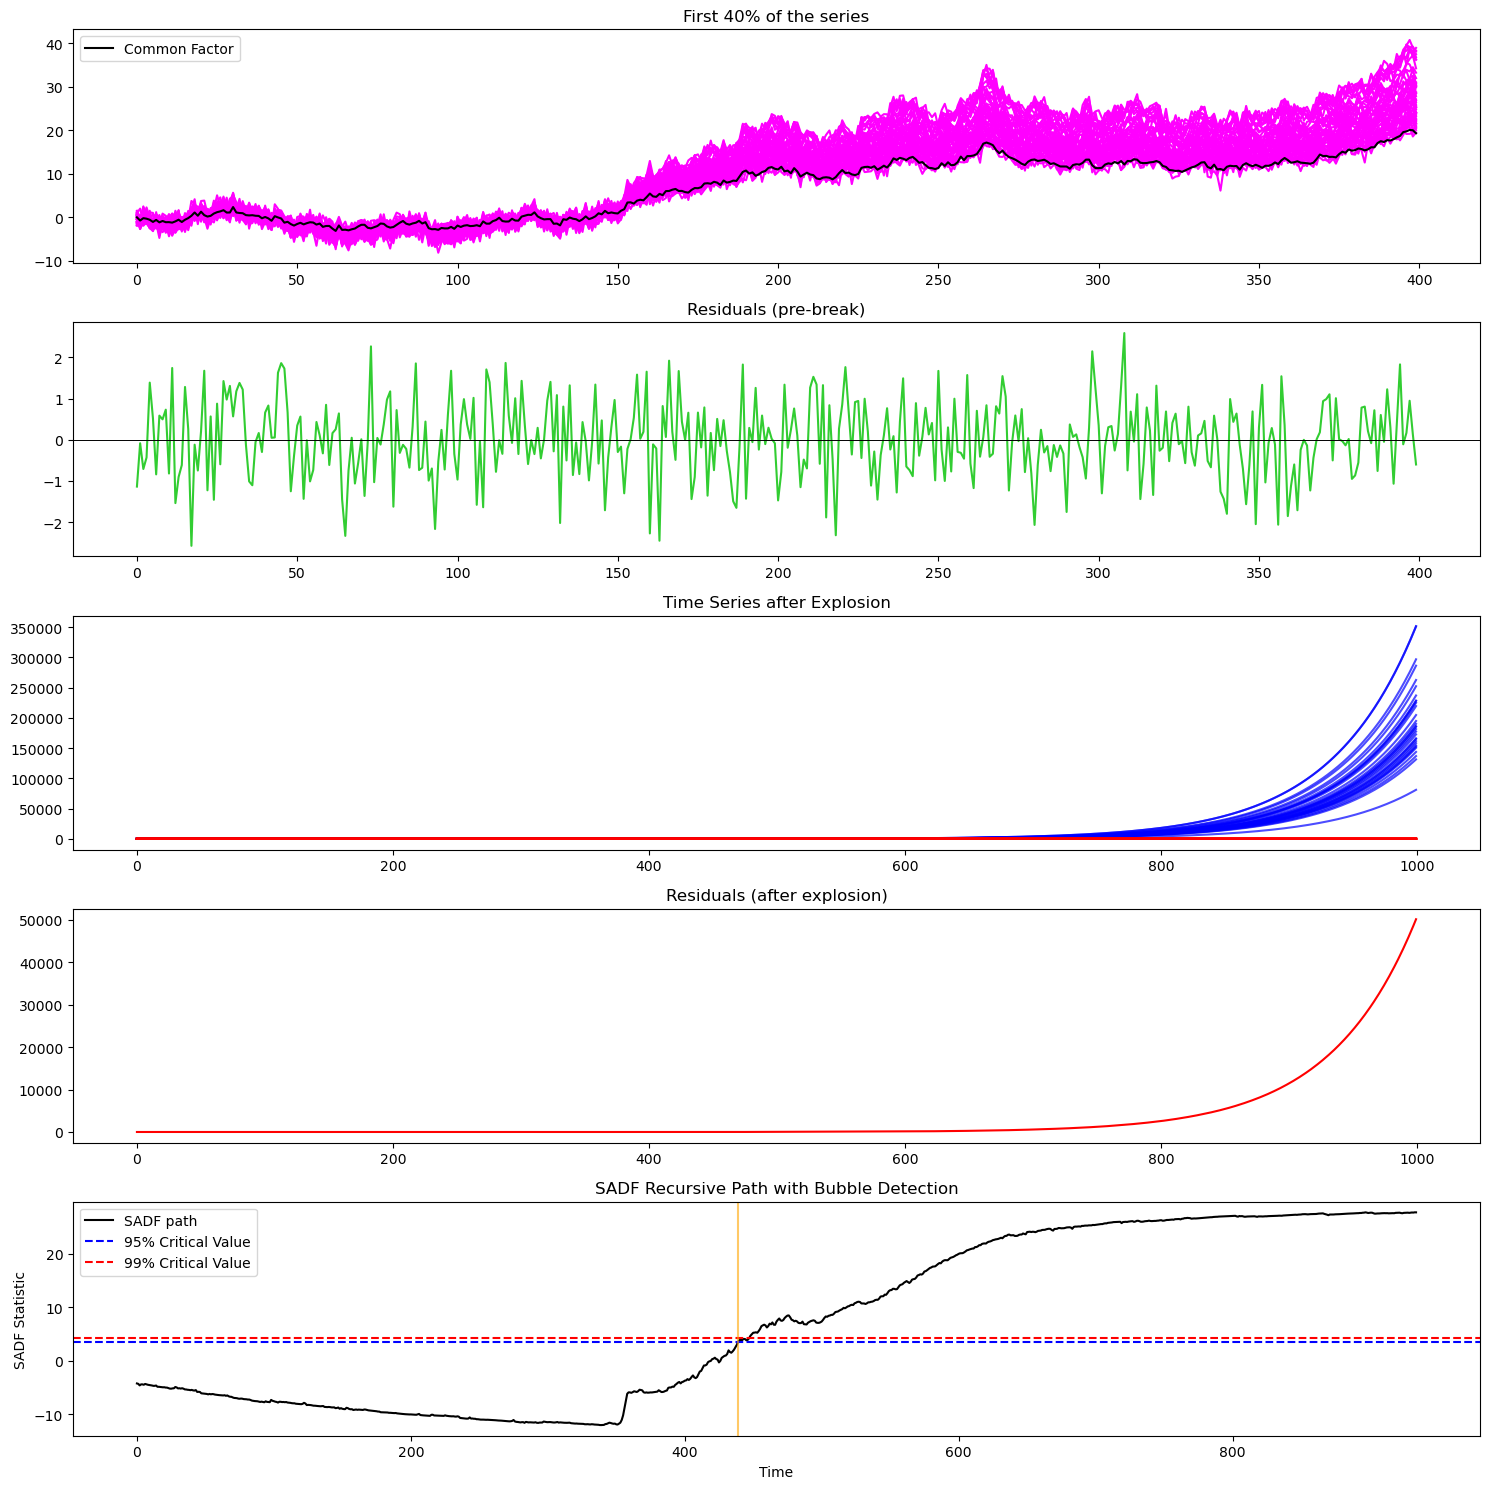

Time series is Explosive. SADF Value is: 27.73

Bubble starts at t=439
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [65]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

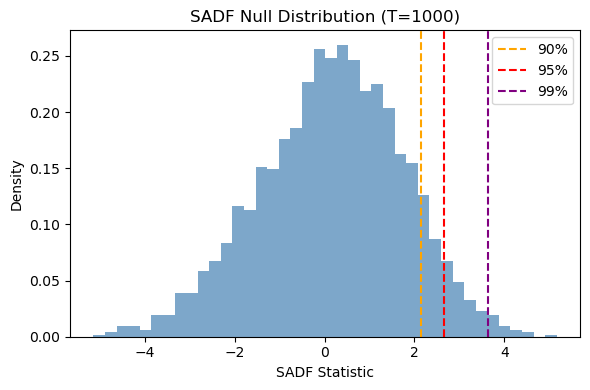

     Critical Value
90%        2.146048
95%        2.668087
99%        3.631749


beta =  [ 0.03209697  0.07580552  0.01429594  0.05541803  0.04816106 -0.02157533
  0.06479309  0.01183731  0.05868307  0.06429517 -0.00461304  0.00265923
 -0.03118036  0.01322674  0.04573759  0.00532853  0.13934191 -0.02207293
  0.04045295  0.07108647 -0.02675505 -0.02362147  0.04085267 -0.01776658
 -0.03598501 -0.09036162  0.05137489  0.08542952  0.01989349 -0.00520238
 -0.02085446  0.04135667  0.01403891  0.00595322  0.07400168  0.03699015
 -0.04351006  0.05368945 -0.06019038  0.08969479  0.02127885 -0.03458343
  0.00377465  0.03000493 -0.04611462  0.02991005 -0.10039015  0.01190646
 -0.02905746]
alpha =  0.0172
ADF on residuals  stat = -25.174


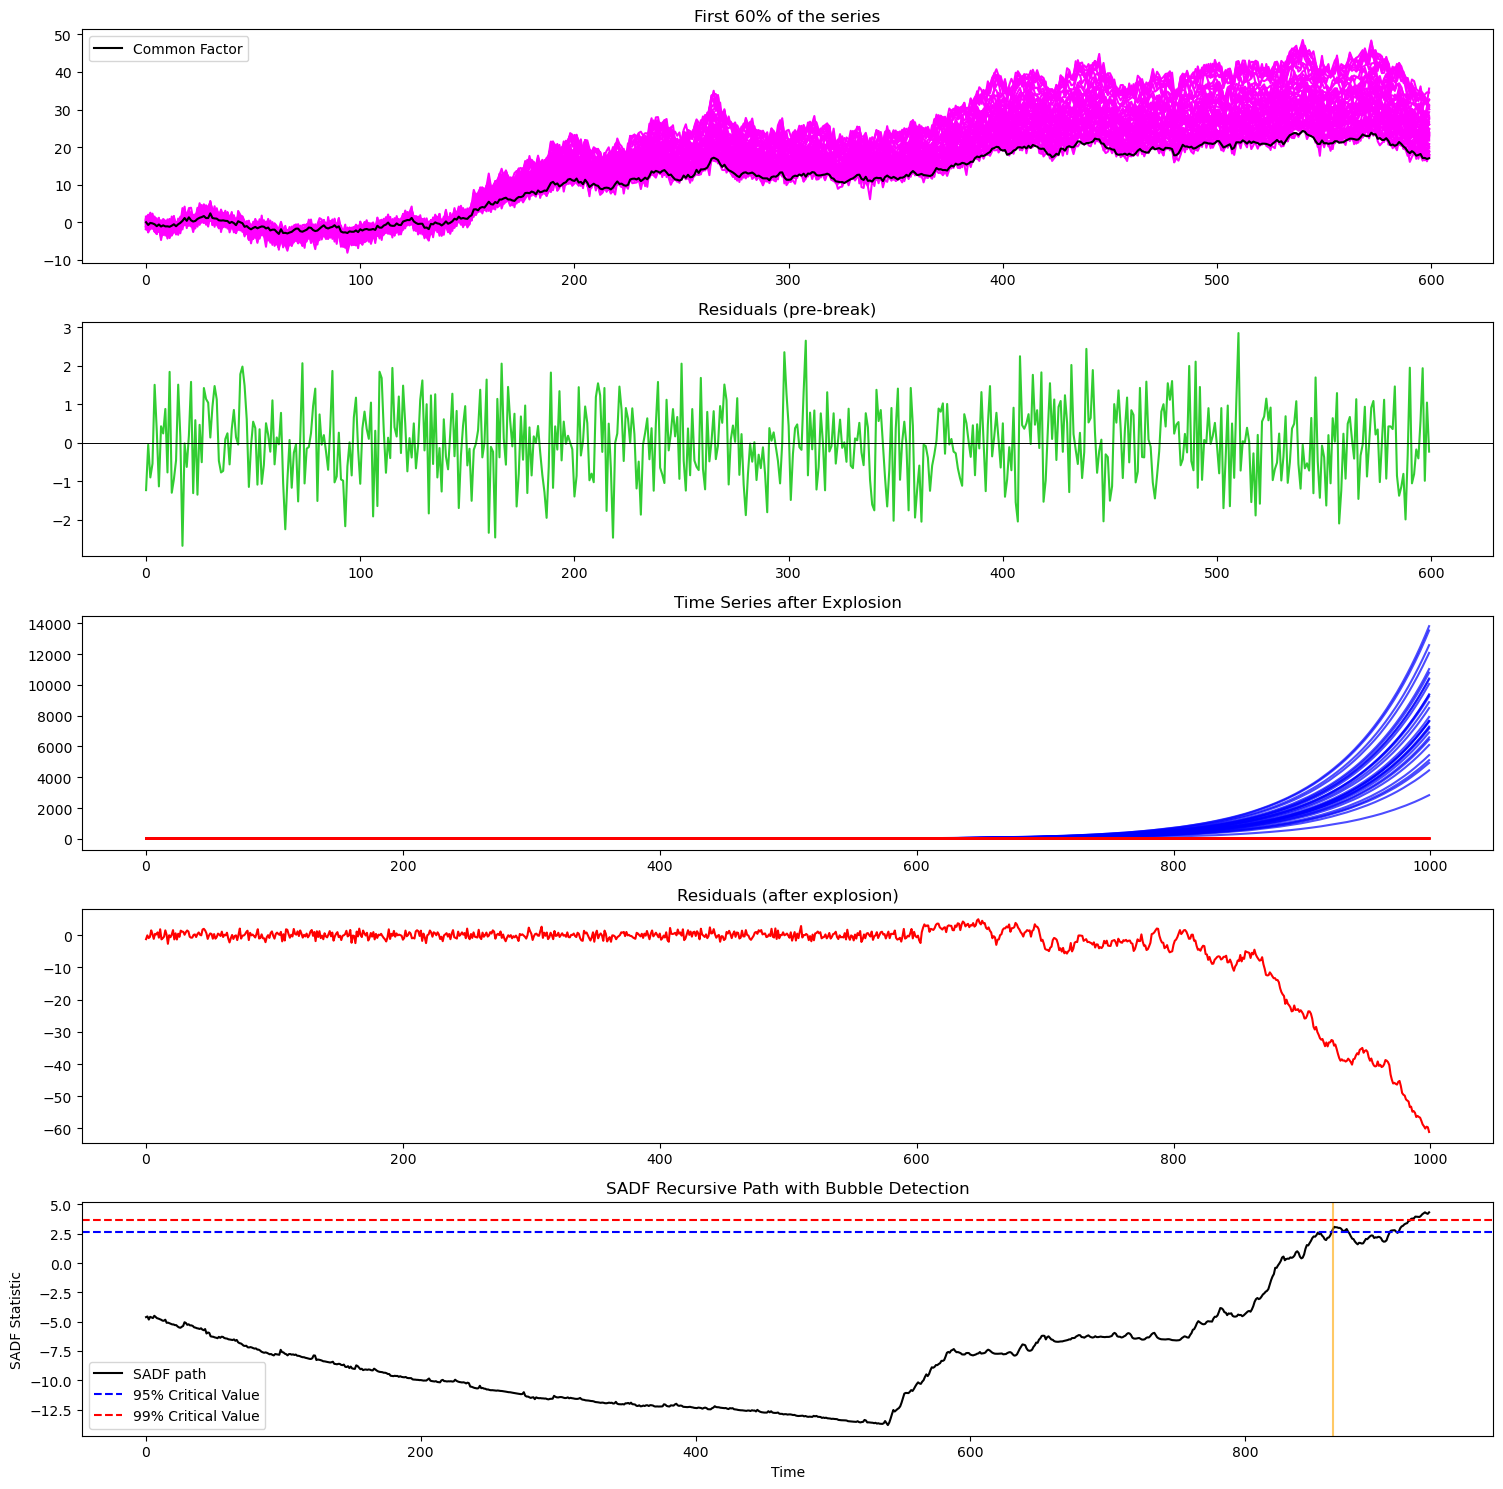

Time series is Explosive. SADF Value is: 4.33

Bubble starts at t=864
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [66]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

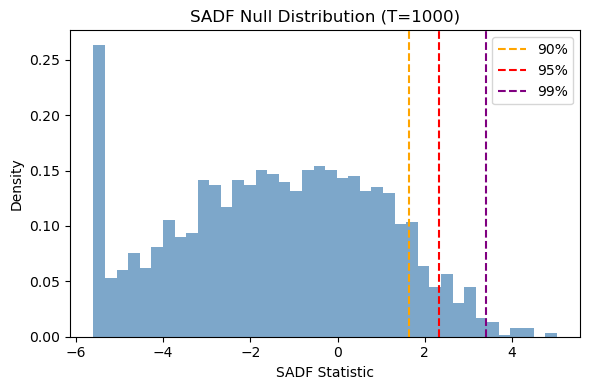

     Critical Value
90%        1.630909
95%        2.325738
99%        3.411068


beta =  [ 0.0053662   0.03290056  0.01012171  0.03899057  0.03437636  0.00788023
  0.02471822  0.00143656  0.06119651  0.08068659 -0.01458302 -0.00306445
 -0.05336349 -0.00372004  0.04145808  0.03220646  0.13006389  0.00490498
  0.03421589  0.06570227 -0.01557132 -0.02048134  0.01057297  0.00781411
 -0.00542006 -0.04735214  0.03015016  0.093731    0.01662464 -0.01841295
  0.02243473  0.02151926  0.02785842  0.01166725  0.05966885  0.01977403
 -0.01341062  0.0132098  -0.01996646  0.09216746  0.01742559 -0.03613079
  0.01766717  0.04131115 -0.06242826  0.05229976 -0.03639878  0.00942437
 -0.07052283]
alpha =  0.0127
ADF on residuals  stat = -29.190


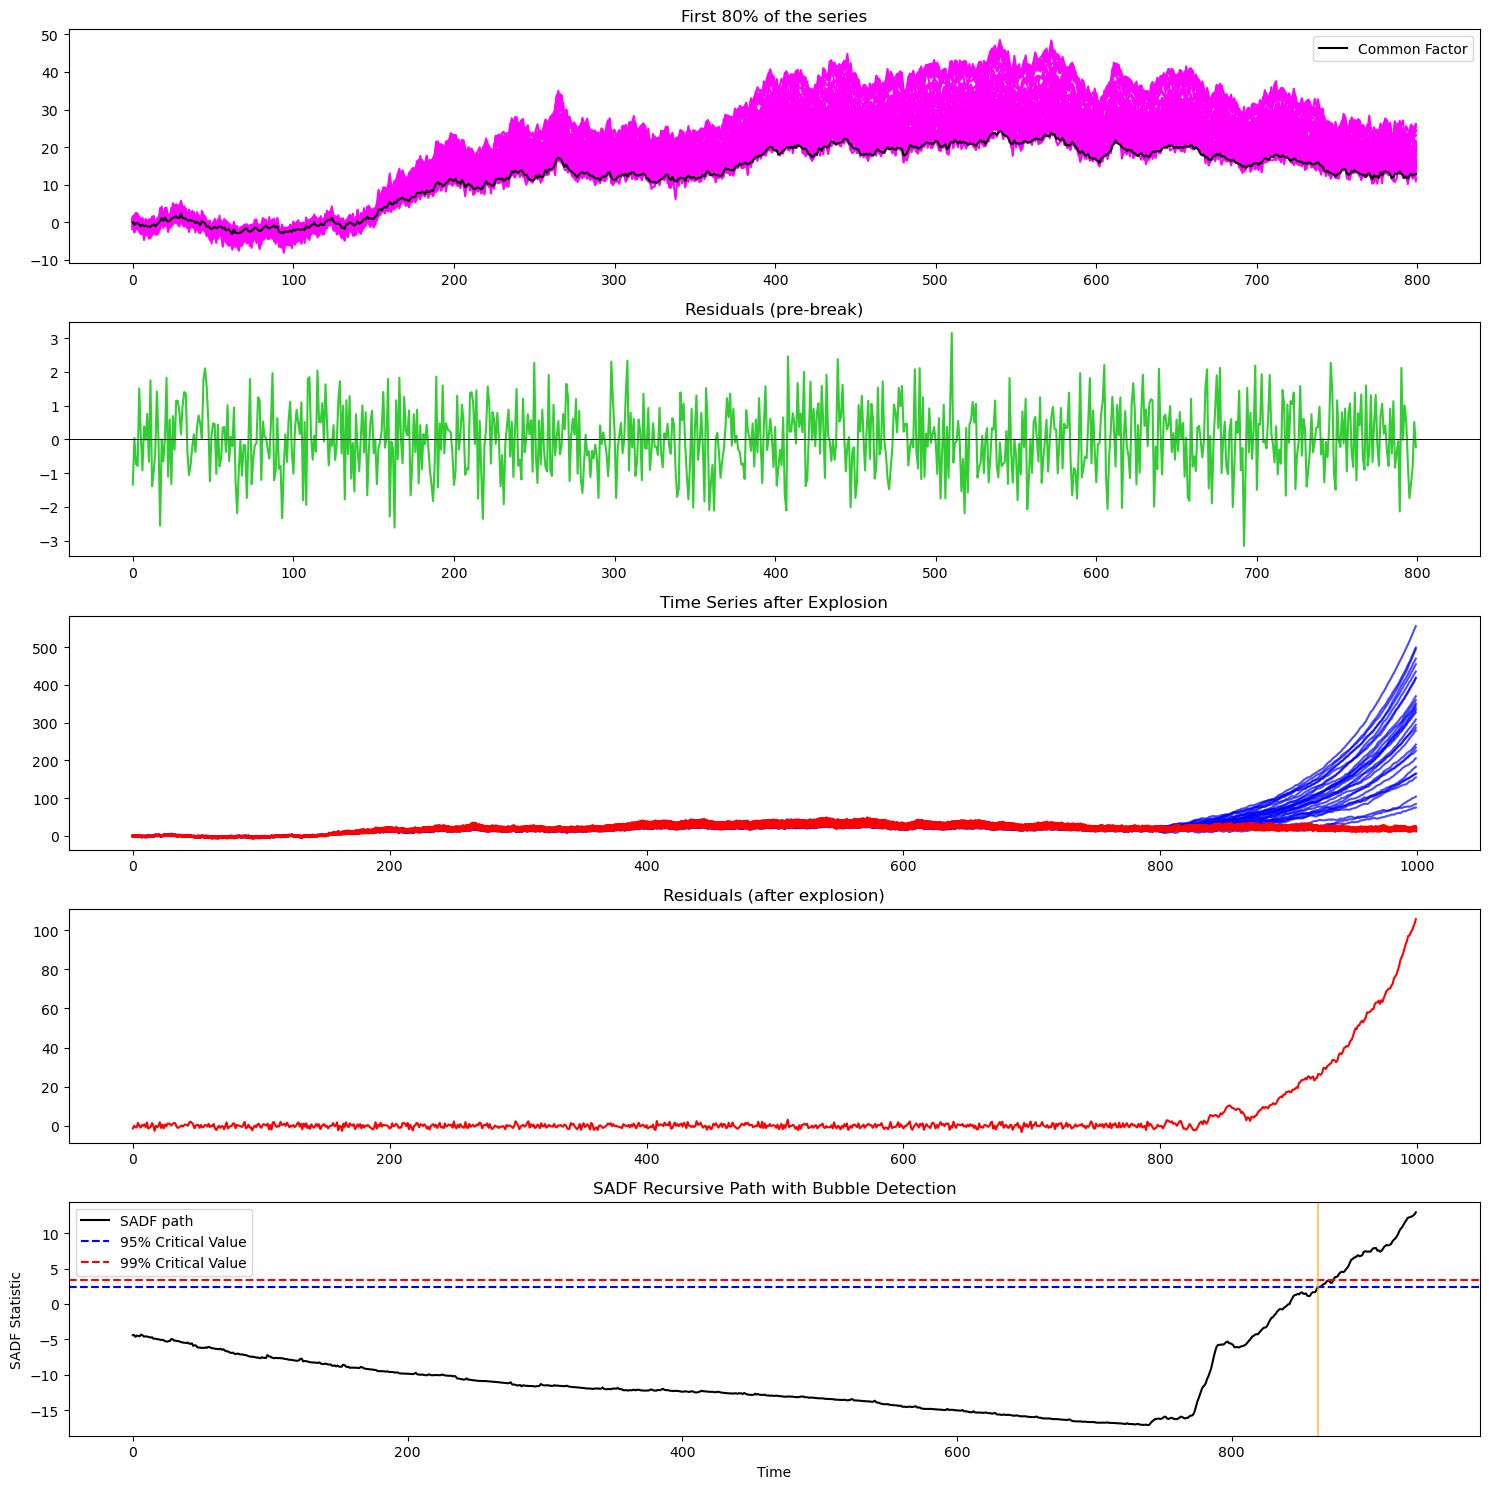

Time series is Explosive. SADF Value is: 12.94

Bubble starts at t=863
Multipliers: [1.112 1.519 1.458 1.873 1.725 1.199 1.333 1.008 1.054 1.872 1.427 1.102
 1.014 1.304 1.284 1.354 1.603 1.353 1.516 1.08  1.404 1.217 1.728 1.948
 1.079 1.629 1.336 1.316 1.419 1.15  1.093 1.293 1.626 1.108 1.162 1.808
 1.949 1.909 1.405 1.294 1.182 1.566 1.531 1.951 1.525 1.884 1.672 1.031
 1.223 1.211]


In [67]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [68]:

# Create the DataFrame and write to CSV
pd.DataFrame({
    'T': T_list,
    'num_series': num_series_list,
    'coint_frac': coint_frac_list,
    'num_of_rw': num_of_rw_list,
    'SADF': SADF_list,
    'crit_95': crit_95_list,
    'crit_99': crit_99_list
}).to_csv(str(num_series) + "_Series_Experiment.csv", index=False)

import sounddevice as sd
fs = 50100  # sample rate
t = np.linspace(0, 2, fs, False)             # 1 second
sd.play(np.sin(2 * np.pi * 440 * t) * 0.5, fs)  # 440 Hz at half volume
sd.wait()
np.random.seed(22)